Patrycja Biryło 1230032 <br>
Štěpán Zelenka 1230017 <br>
https://github.com/qettera/Machine-Learning-Overview

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score, confusion_matrix #, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from patsy import dmatrix
import statsmodels.api as sm
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


- [EDA](#1.-exploratory-data-analysis)  
- [Methods Application: LR, LDA and QDA](#2.-Methods-Application)  
- [Feature Selection](#3-feature-selection)  
- [Learning a non-linear function](#4-learning-a-non-linear-function)  
- [Decision Trees and Random Forest](#5-decision-trees-and-random-forest)  
- [Support Vector Machine](#6-support-vector-machine-svm)  
- [Principal Component Analysis](#7-principal-component-analysis-pca)

## 1. Exploratory Data Analysis

The mel frequency cepstral coefficients (MFCCs) of an audio signal are a small set of features (usually about 10–20) which describe the overall shape of the spectral envelope. MFCCs were frequently used for voice recognition before the task started to be performed using deep learning.

*for each sound: 13 means (media) and 13 standard deviations (desvio)*

In [2]:
import pandas as pd

# This is loading a csv which is a result of merging three csv files with car horn, gunshot and jackhammer MFCC data.
df = pd.read_csv('all.csv')

Let's have a look on our dataset first:

In [3]:
df.head(5)

media0    media1    media2    media3    media4    media5    media6  \
0  4.677986 -1.966398  1.688301 -3.354441  1.043490 -1.798730 -0.767414   
1  4.677564 -2.953498  1.426739 -2.261733  0.930528 -2.665626 -0.332971   
2  3.872289 -3.173699  1.931834 -1.202015  0.610031 -2.204595 -0.295343   
3  5.160424 -3.750595  2.151555 -1.886166  1.334776 -2.151562 -0.546990   
4  2.252624 -3.644894  1.939464 -1.974539  1.823046 -1.844794 -1.132419   

     media7    media8    media9  ...   desvio4   desvio5   desvio6   desvio7  \
0 -1.614851 -0.185658 -0.029143  ...  1.890468  1.410196  0.803002  1.311613   
1 -0.714048  0.139587 -0.898208  ...  1.472251  2.427163  0.554742  0.577265   
2 -0.319409 -0.161939 -1.040936  ...  1.159666  2.092606  0.540943  0.634752   
3 -0.359816  0.054898 -1.013008  ...  1.627613  2.086991  0.654731  0.591023   
4 -0.942162  0.582952 -0.769522  ...  2.167108  1.868980  1.226150  1.161215   

    desvio8   desvio9  desvio10  desvio11  desvio12    classe  
0  0.601646  0.769883  0.416295  0.564592  0.349746  car_horn  
1  0.766374  0.758806  0.532139  0.454760  0.376218  car_horn  
2  0.439129  1.018796  0.385876  0.508423  0.394474  car_horn  
3  0.497059  0.950790  0.567042  0.393286  0.332839  car_horn  
4  1.018720  0.892772  0.453530  0.655595  0.546549  car_horn  

[5 rows x 27 columns]

### Descriptive Statistics
We're going to start with the descriptive statistics to get an overview of the numerical columns in the dataset.

In [4]:
df.describe()

media0       media1       media2       media3       media4  \
count  1803.000000  1803.000000  1803.000000  1803.000000  1803.000000   
mean      3.495076    -2.184187     1.073255    -0.698825     0.455421   
std       3.605594     1.792660     1.425874     0.954231     0.904173   
min      -4.672307    -9.984891    -5.472591    -4.068377    -4.362307   
25%       0.401549    -3.338016     0.517790    -1.269979    -0.105763   
50%       3.897727    -2.127124     1.070444    -0.717425     0.528501   
75%       6.220131    -1.201787     1.952195    -0.131011     1.133396   
max      10.602967     2.943808     4.826087     2.914812     3.156123   

            media5       media6       media7       media8       media9  ...  \
count  1803.000000  1803.000000  1803.000000  1803.000000  1803.000000  ...   
mean     -0.364949     0.287642     0.002218     0.228245    -0.124225  ...   
std       0.801812     0.731956     0.645442     0.515347     0.523789  ...   
min      -3.794095    -2.701501    -1.856276    -2.150302    -2.626062  ...   
25%      -0.866011    -0.110261    -0.397775    -0.132682    -0.408994  ...   
50%      -0.334075     0.367085    -0.010347     0.248138    -0.135857  ...   
75%       0.188993     0.767006     0.394905     0.589735     0.170755  ...   
max       2.050018     2.381640     2.096199     2.274243     1.788323  ...   

           desvio3      desvio4      desvio5      desvio6      desvio7  \
count  1803.000000  1803.000000  1803.000000  1803.000000  1803.000000   
mean      1.210243     1.095423     0.908105     0.852591     0.728579   
std       0.628151     0.552409     0.544199     0.438909     0.346493   
min       0.334159     0.295266     0.265892     0.280354     0.280959   
25%       0.745493     0.625401     0.545898     0.536299     0.489104   
50%       1.072896     1.024874     0.753169     0.738506     0.622663   
75%       1.517922     1.464322     1.073476     1.030323     0.855334   
max       4.357339     3.719680     4.920654     3.605649     2.860202   

           desvio8      desvio9     desvio10     desvio11     desvio12  
count  1803.000000  1803.000000  1803.000000  1803.000000  1803.000000  
mean      0.674253     0.647240     0.578561     0.553523     0.356440  
std       0.289774     0.300969     0.251892     0.239224     0.066549  
min       0.136682     0.267503     0.190234     0.176745     0.163466  
25%       0.460650     0.462194     0.412720     0.388282     0.315536  
50%       0.590892     0.570859     0.515397     0.484400     0.343735  
75%       0.806172     0.745861     0.666146     0.635796     0.380651  
max       1.935464     2.905896     2.263505     2.240934     1.069302  

[8 rows x 26 columns]

**Data types & missing values**

Next, we should check the data types of each column and see if there are any missing values.

In [5]:
df_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})

df_info

Data Type  Missing Values  Unique Values
media0     float64               0           1803
media1     float64               0           1803
media2     float64               0           1803
media3     float64               0           1801
media4     float64               0           1803
media5     float64               0           1801
media6     float64               0           1803
media7     float64               0           1802
media8     float64               0           1801
media9     float64               0           1802
media10    float64               0           1802
media11    float64               0           1800
media12    float64               0           1803
desvio0    float64               0           1803
desvio1    float64               0           1802
desvio2    float64               0           1803
desvio3    float64               0           1802
desvio4    float64               0           1802
desvio5    float64               0           1802
desvio6    float64               0           1802
desvio7    float64               0           1801
desvio8    float64               0           1799
desvio9    float64               0           1801
desvio10   float64               0           1801
desvio11   float64               0           1801
desvio12   float64               0           1790
classe      object               0              3

As we can see, dataset is in a very good condition: we have no missing values and all the values are numeric, so there is no need to clean the data.

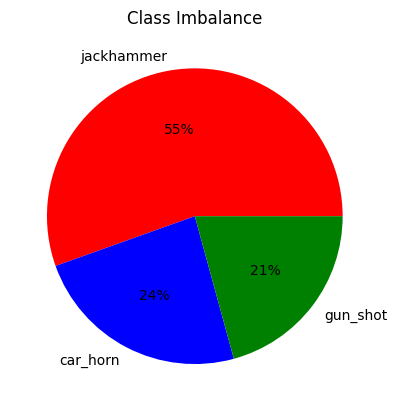

In [6]:
import matplotlib.pyplot as plt

# plot a pie plot with the percentage of each class
df['classe'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['red', 'blue', 'green', 'yellow', 'orange', 'purple'])
plt.title('Class Imbalance')
plt.ylabel('')
plt.show()

In [7]:
df['classe'].value_counts()

jackhammer    1000
car_horn       429
gun_shot       374
Name: classe, dtype: int64

Our classes are imbalanced: class jackhammer have twice more examples than the other classes. It can impact the evaluation of the models.

### Univariate Analysis (Distribution of individual features)


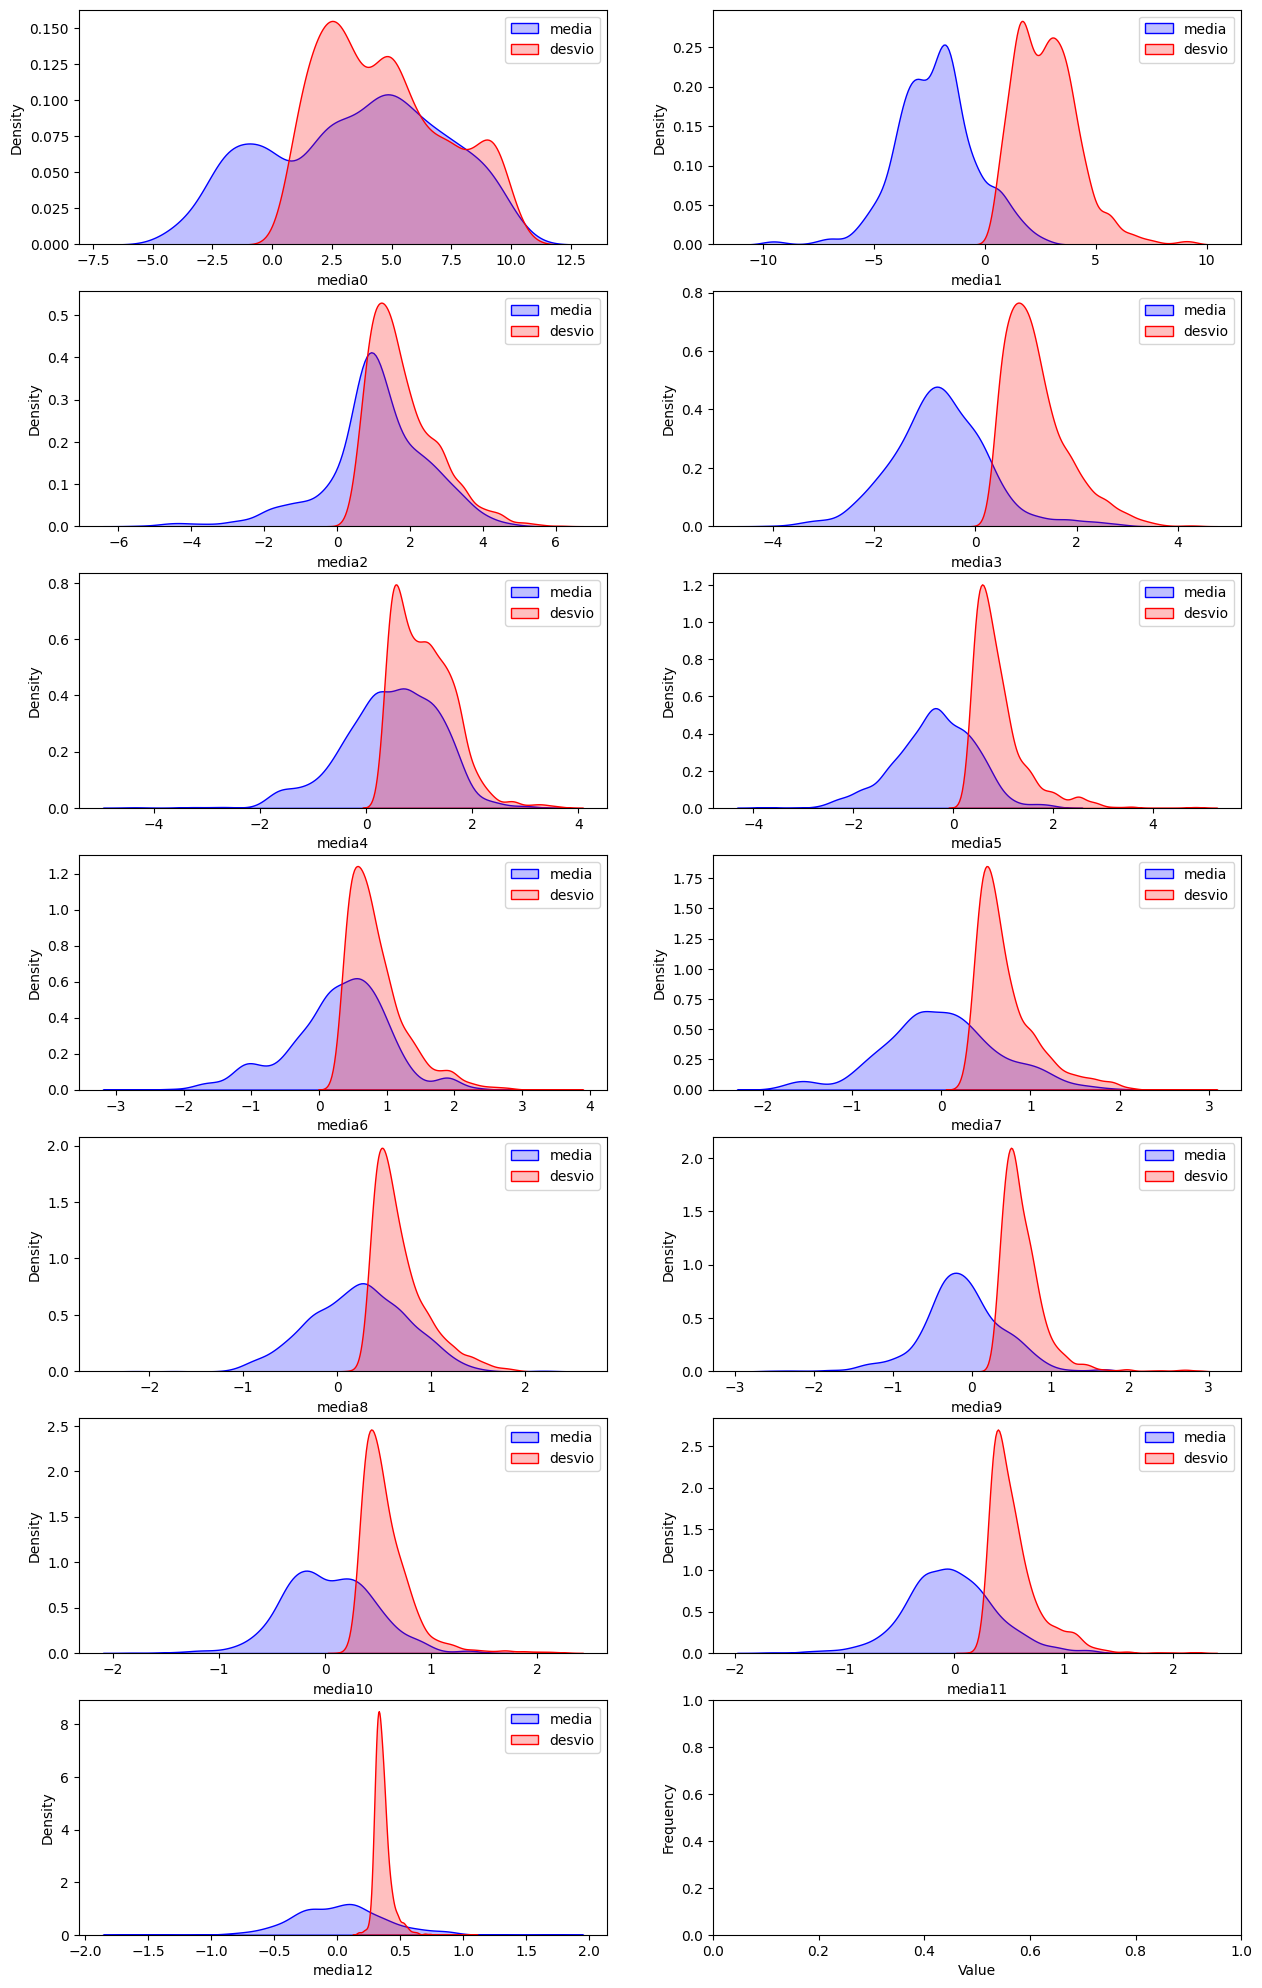

In [8]:
_, axes = plt.subplots(7, 2, figsize=(15,25))

for i in range(0, 7):
    sns.kdeplot(data=df, x='media' + str(i*2), shade=True, color='blue', ax=axes[i][0])
    sns.kdeplot(data=df, x='desvio' + str(i*2), shade=True, color='red', ax=axes[i][0])
    axes[i][0].set_ylabel('Density')
    axes[i][0].legend(['media', 'desvio'])
    if (i == 6):
        continue
    sns.kdeplot(data=df, x='media' + str(i*2 + 1), shade=True, color='blue', ax=axes[i][1])
    sns.kdeplot(data=df, x='desvio' + str(i*2 + 1), shade=True, color='red', ax=axes[i][1])
    axes[i][1].set_ylabel('Density')
    axes[i][1].legend(['media', 'desvio'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

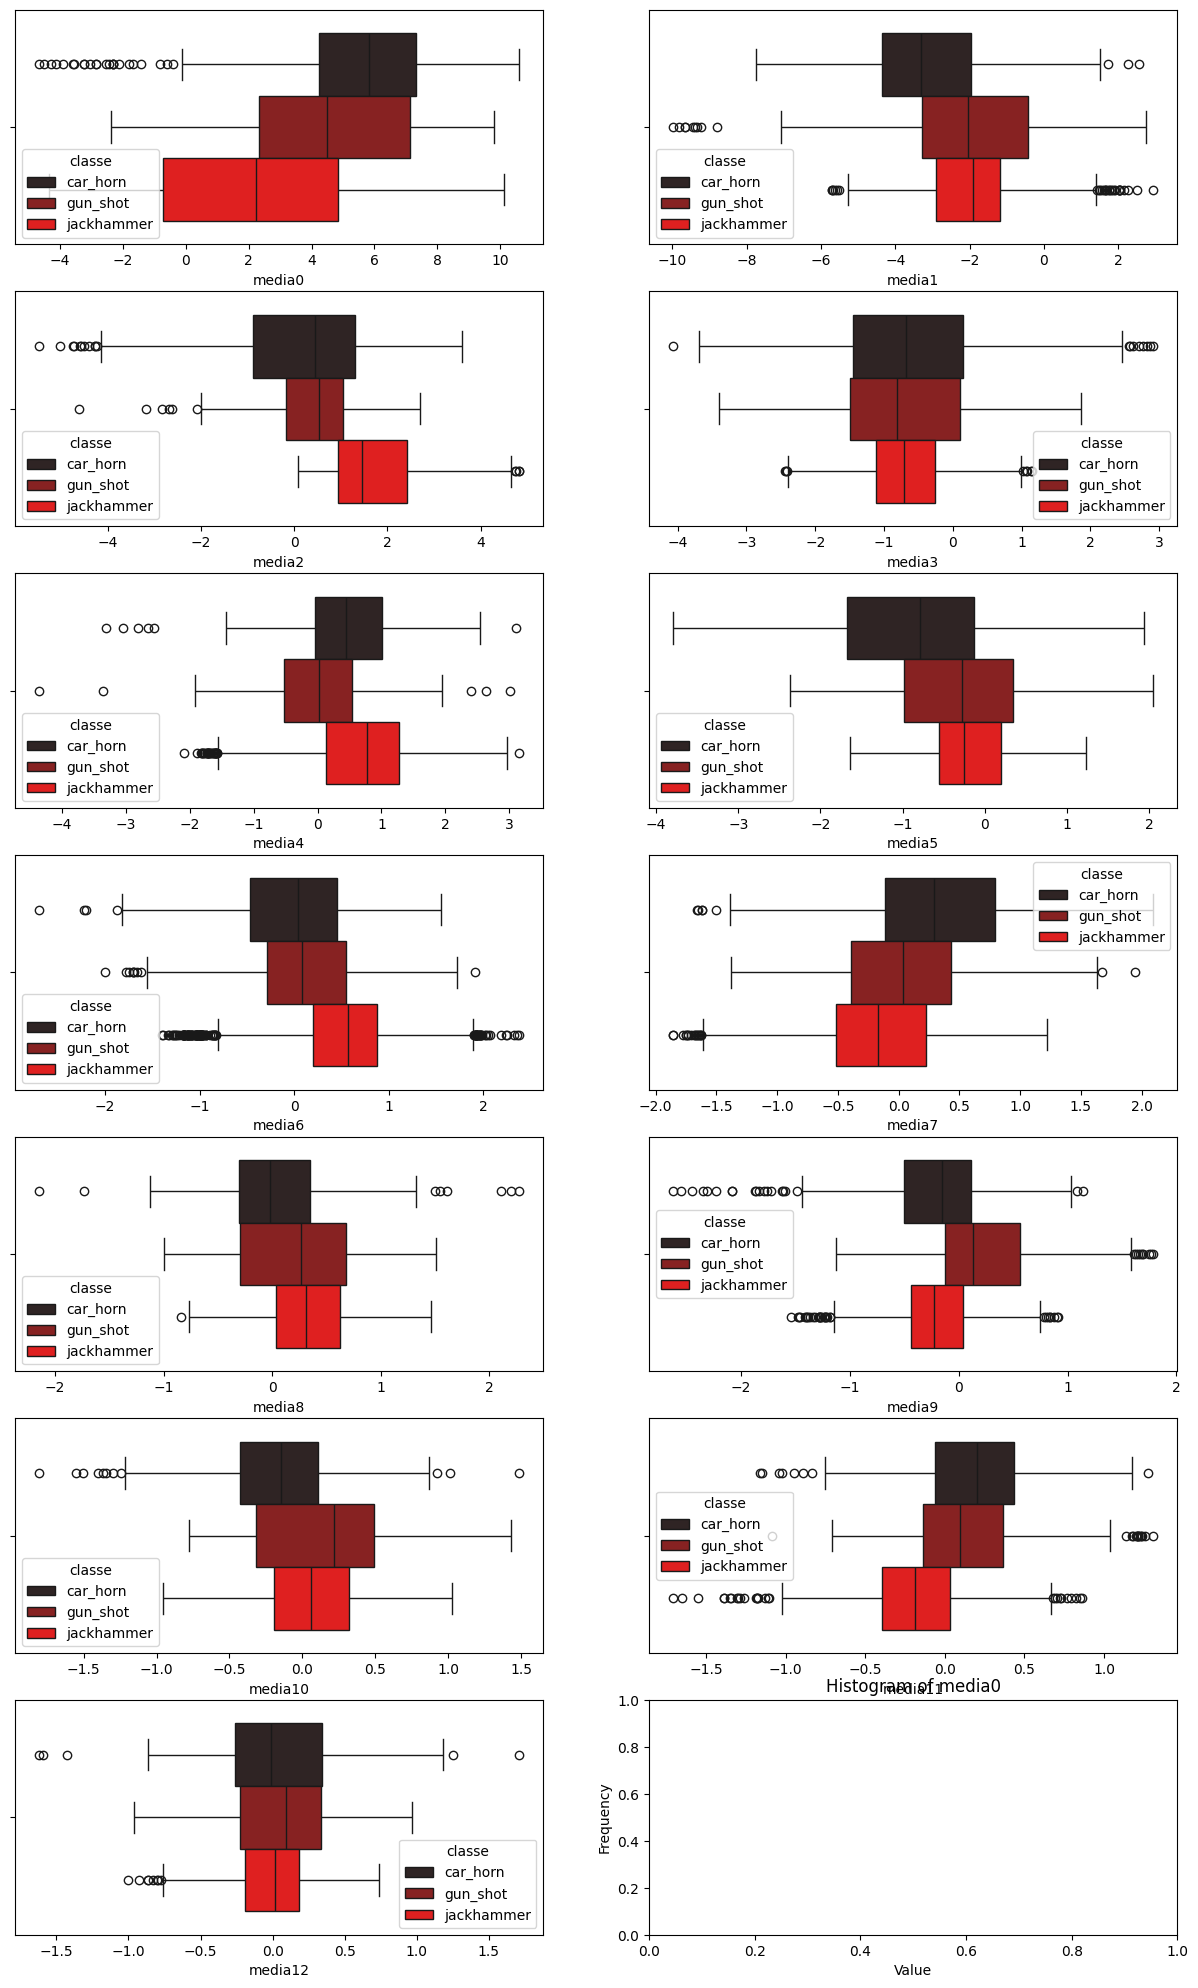

In [9]:
_, axes = plt.subplots(7, 2, figsize=(15,25))

for i in range(0, 7):
    sns.boxplot(data=df, x='media' + str(i*2), hue='classe', color='red', ax=axes[i][0])
    if (i == 6):
        continue
    sns.boxplot(data=df, x='media' + str(i*2 + 1), hue='classe', color='red', ax=axes[i][1])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of media0')
plt.show()

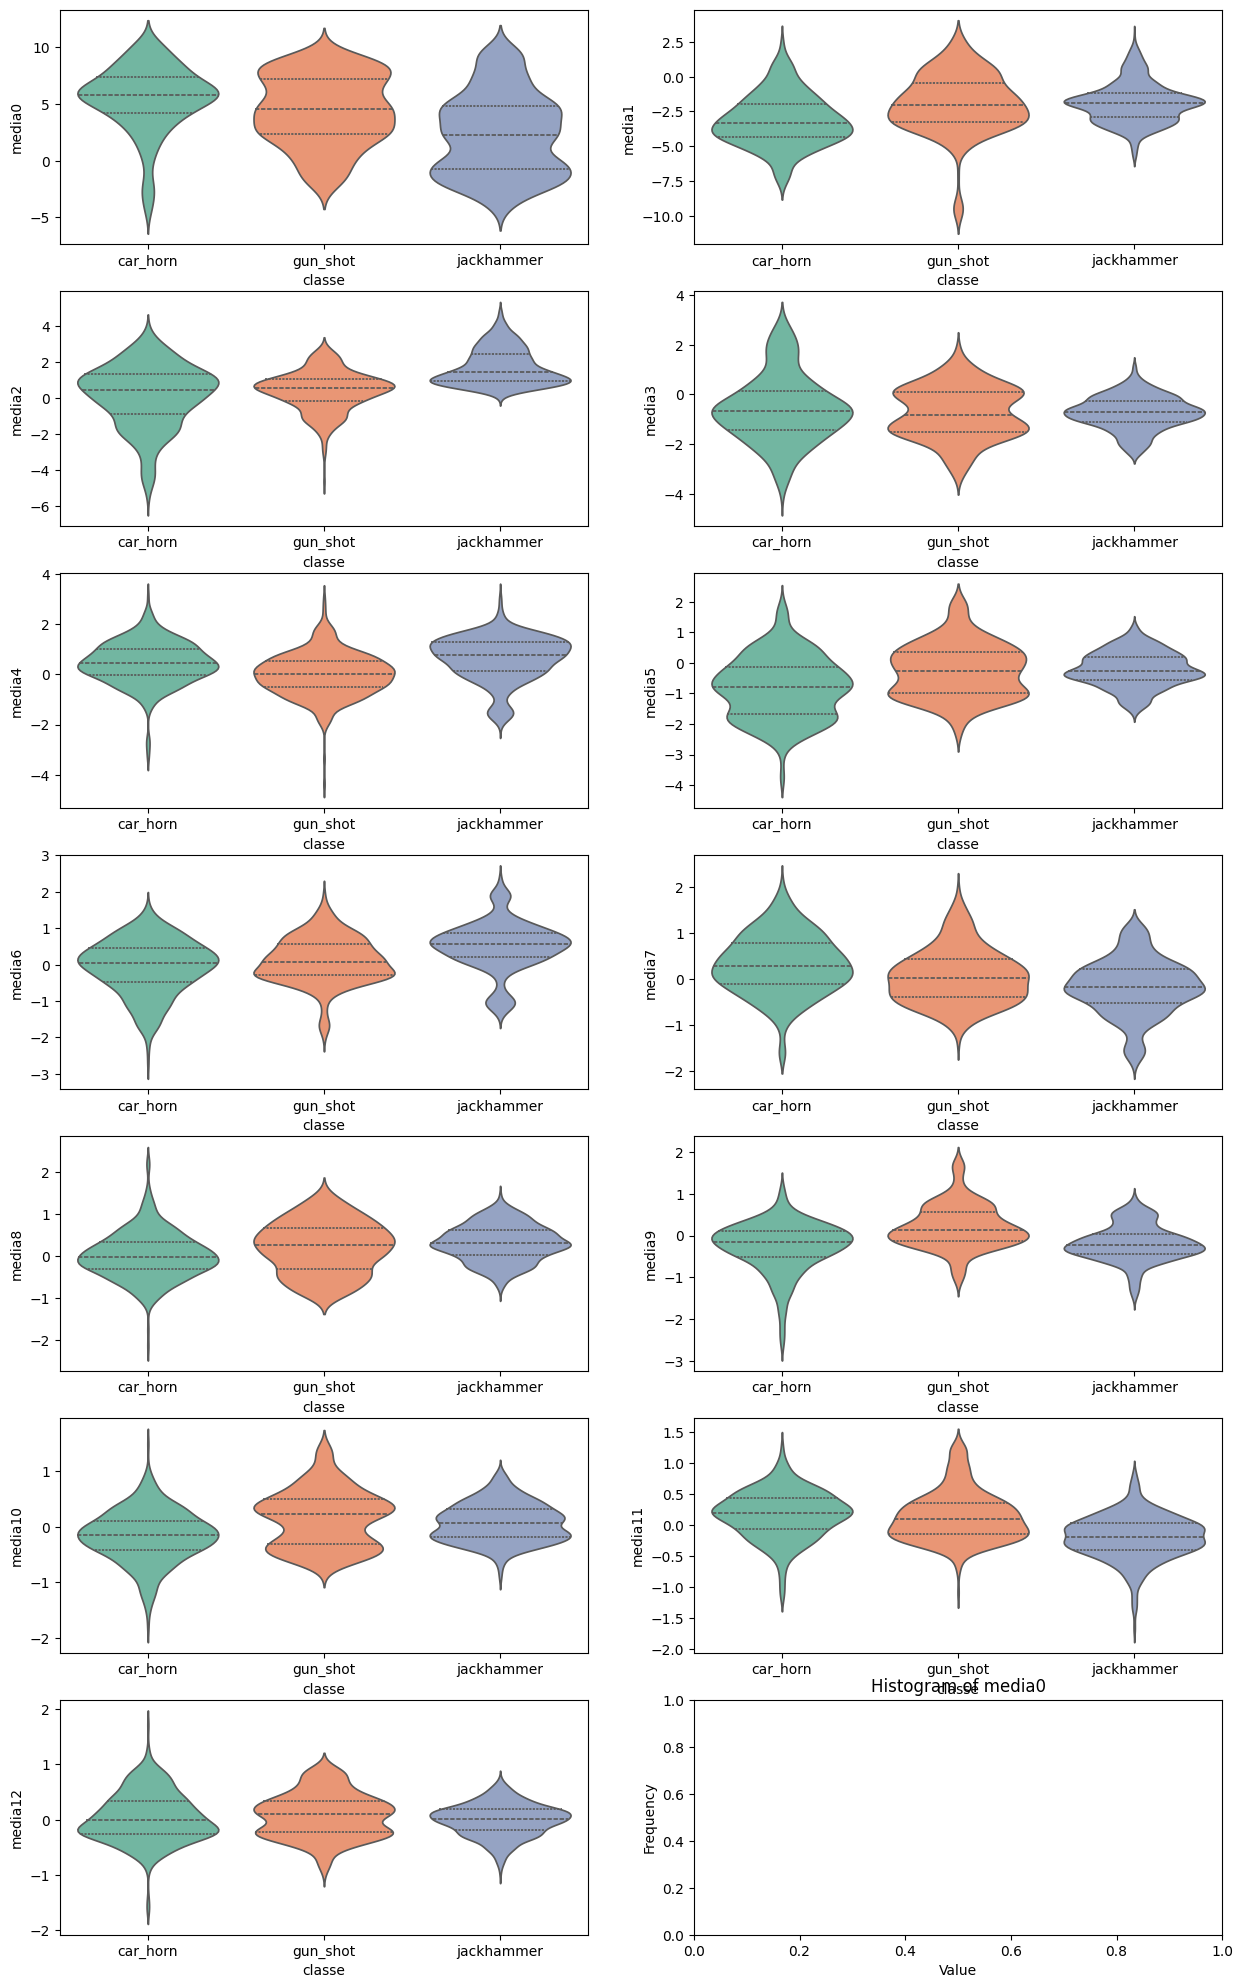

In [10]:
_, axes = plt.subplots(7, 2, figsize=(15,25))

for i in range(0, 7):
    sns.violinplot(data=df, x='classe', y='media' + str(i*2), inner='quart', palette='Set2', ax=axes[i][0])
    if (i == 6):
        continue
    sns.violinplot(data=df,x='classe', y='media' + str(i*2 + 1), inner='quart', palette='Set2', ax=axes[i][1])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of media0')
plt.show()

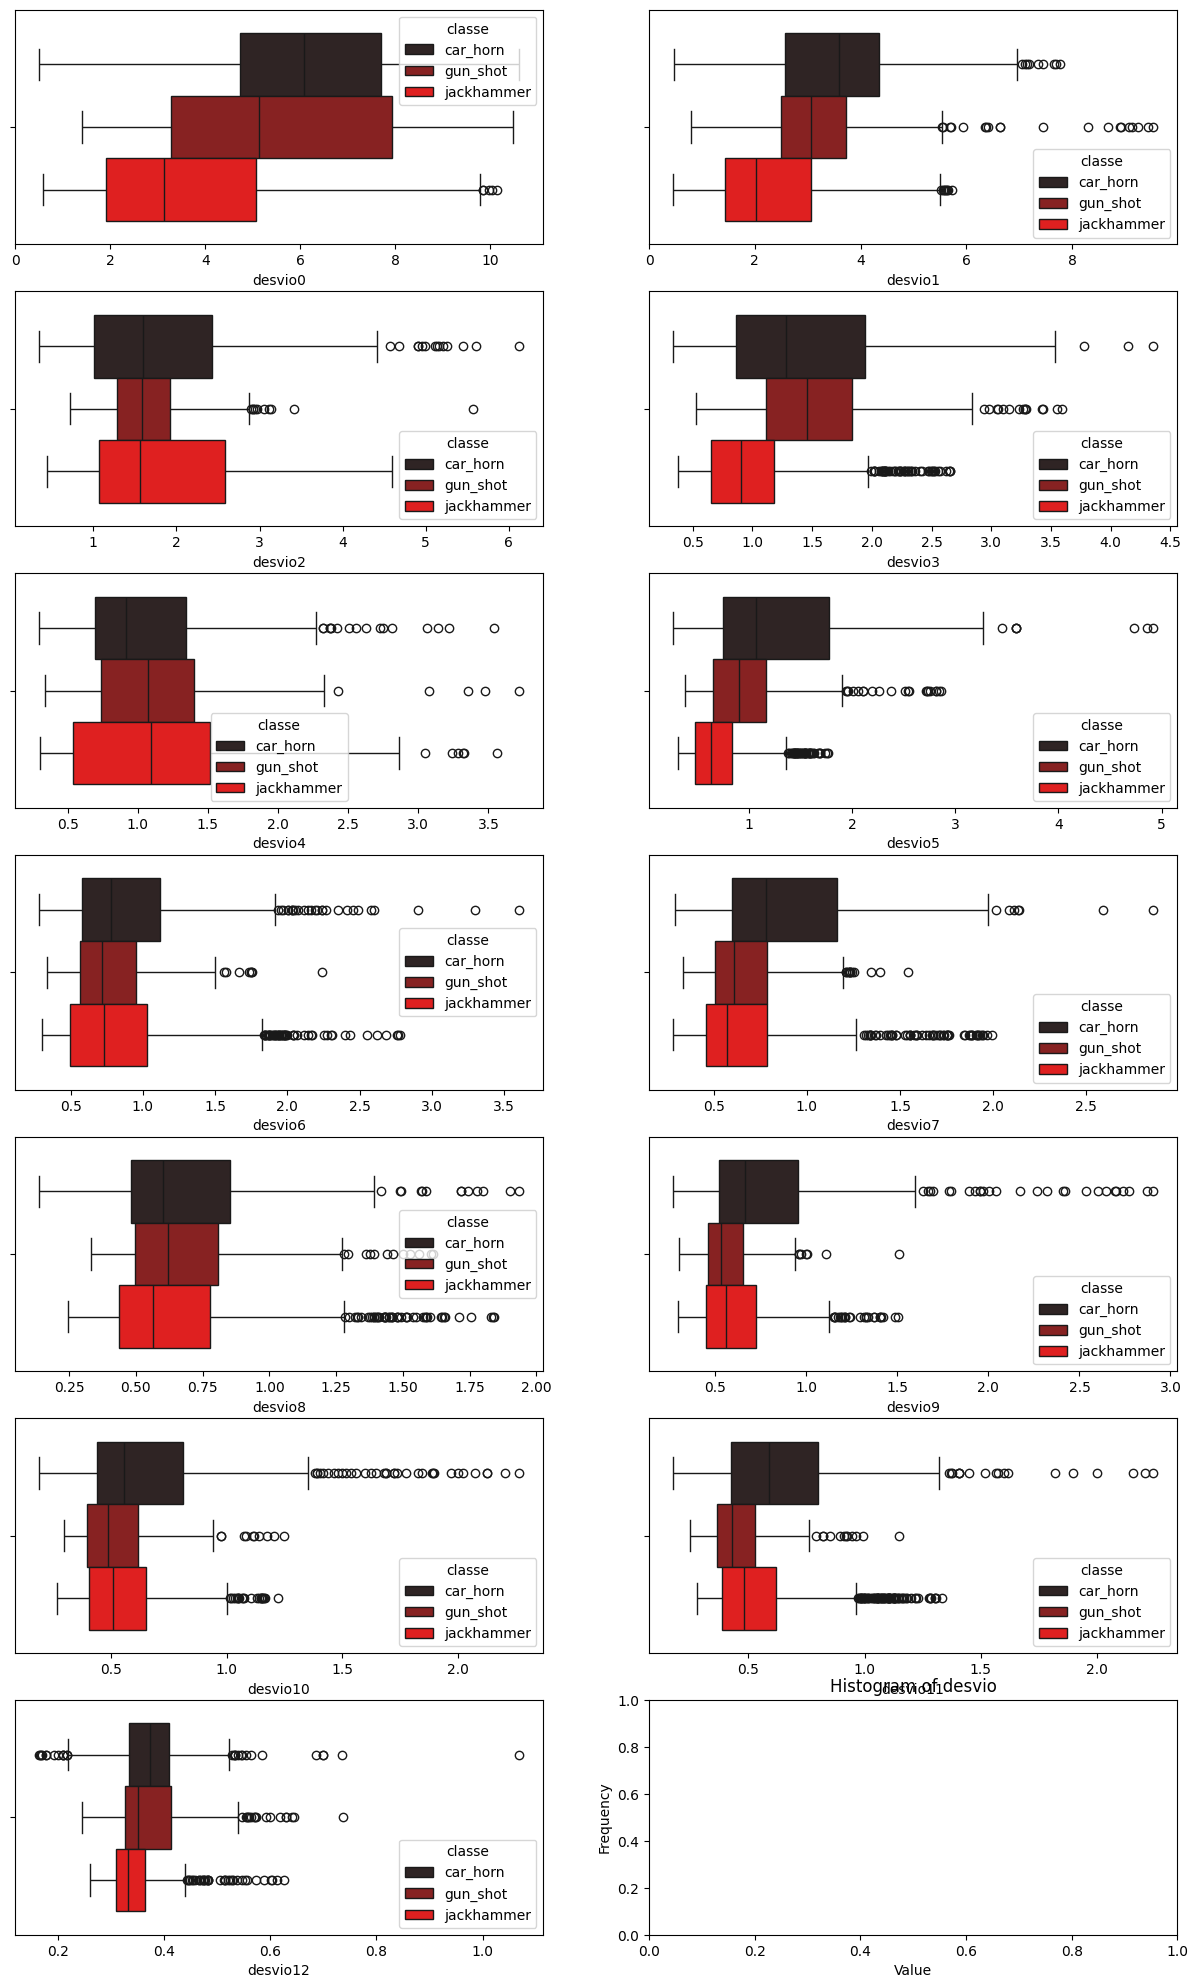

In [11]:
_, axes = plt.subplots(7, 2, figsize=(15,25))

for i in range(0, 7):
    sns.boxplot(data=df, x='desvio' + str(i*2), hue='classe', color='red', ax=axes[i][0])
    if (i == 6):
        continue
    sns.boxplot(data=df, x='desvio' + str(i*2 + 1), hue='classe', color='red', ax=axes[i][1])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of desvio')
plt.show()


### Bivariate Analysis (Correlation between features and the different target variables)
**In the bivariate analysis, we need to understand the relationship between the individual features and the target variable: class of the sound.**

Here, we will plot the relationship between each mean and standard deviation. We will differentiate each of the 3 classes with a different style and see how the values differ for each of the class.
The idea is to find some mean-std pairs where we can see the difference between the classes.

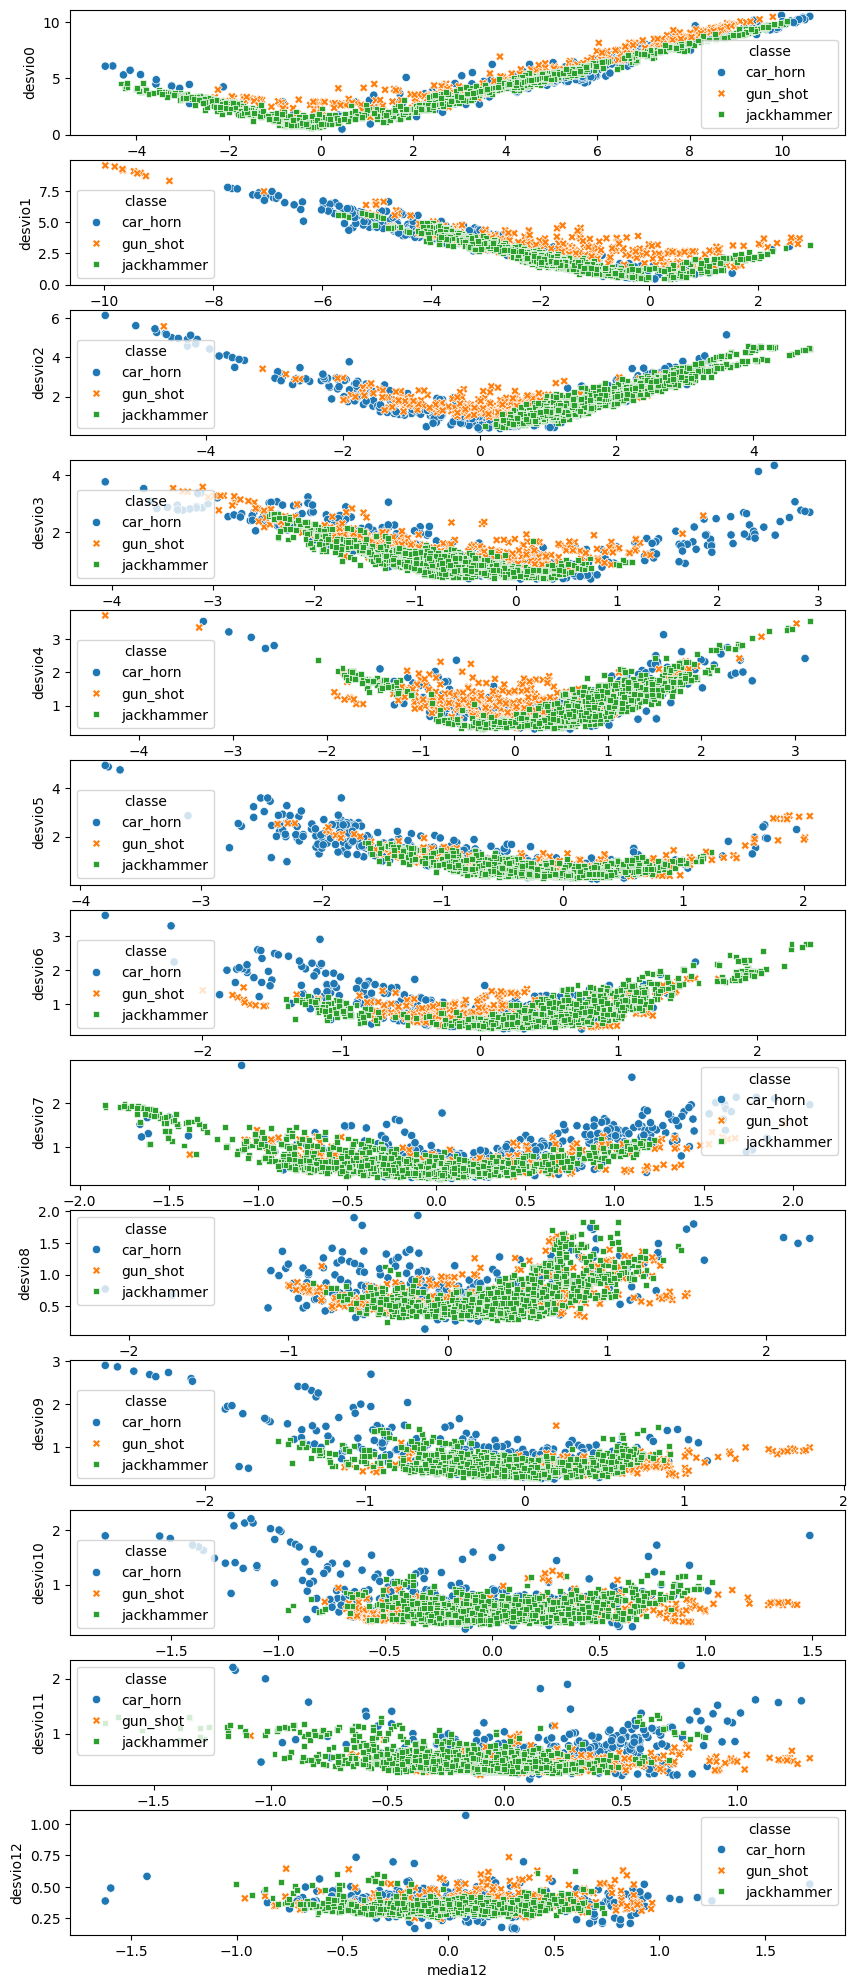

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(13, 1, figsize=(10,25))

for i in range(0,13):
    j = str(i)
    sns.scatterplot(data=df, x='media' + j, y='desvio' + j, ax=axes[i], hue='classe', style='classe')
plt.show()

From the graph, we see that some pairs have values very simillar for all the classes (e.g. the 1th or the 13th one), while in some we can see differences (namely 3rd one).
We can use this information to select (or maybe discard) the features that hold no information about the differences between each class.

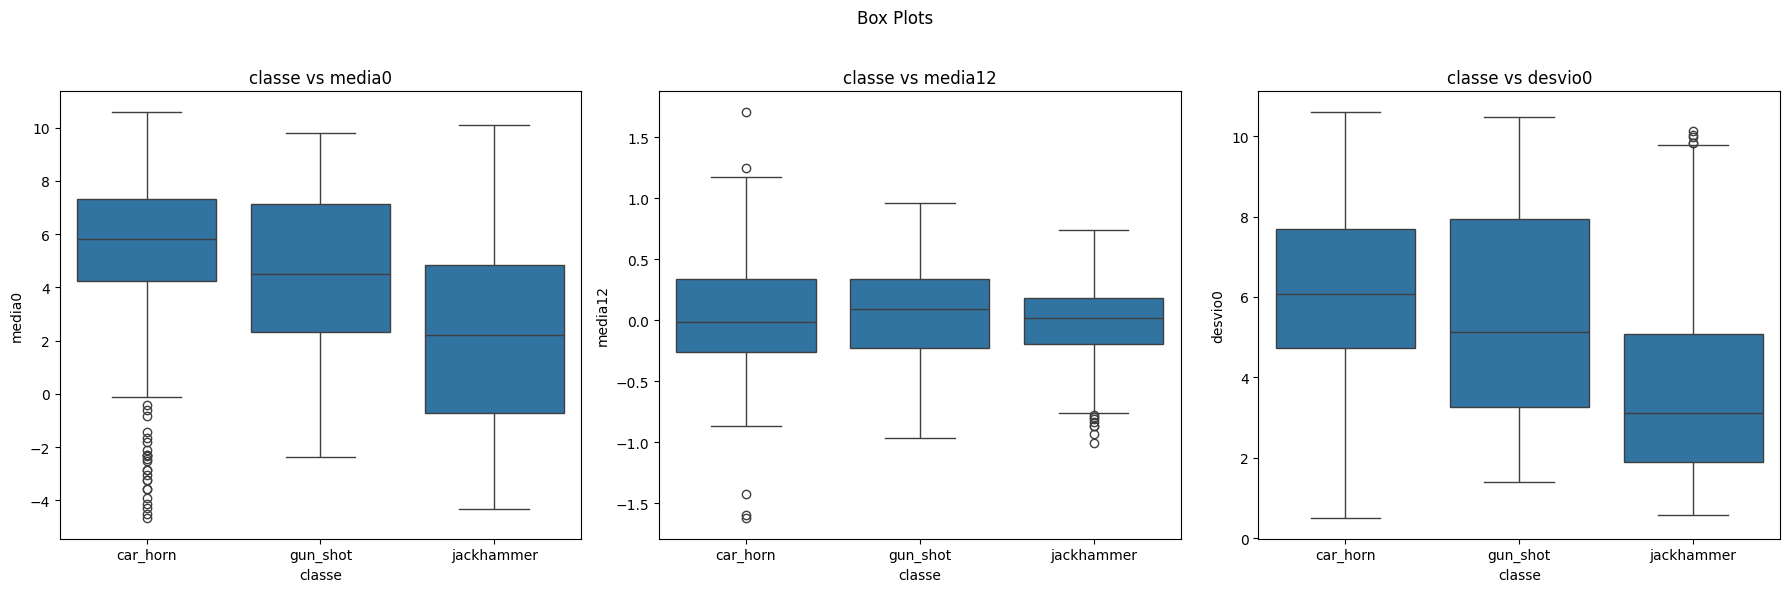

In [13]:
# Plot box plots for categorical variables vs charges
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Box Plots')

sns.boxplot(x='classe', y='media0', data=df, ax=axes[0])
axes[0].set_title('classe vs media0')

sns.boxplot(x='classe', y='media12', data=df, ax=axes[1])
axes[1].set_title('classe vs media12')

sns.boxplot(x='classe', y='desvio0', data=df, ax=axes[2])
axes[2].set_title('classe vs desvio0')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Summary:
- The dataset is a little bit **imbalanced**, with jackhammer beign 55 % of the samples, car_horn is 24 % and gun_shot is 21 %.
- The feature distributions do not have any big shifts. Some of the features have higher variance then others (maybe they provide more information)
- From our observations, the **media2 with desvio2** hold the most information useful for the models.

## 2. Methods Application

Consider using the following methods: Logistic Regression, Linear Discriminant Analysis (LDA)
and Quadratic Discriminant Analysis (QDA). Applying the methods to the chosen data, try to
decide which method is most appropriate for the problem, giving reasons for your choice. Use the
following resampling methods for the various suggested models: <br>
• Holdout<br>
• Cross Validation (with k = 5 and k = 10)<br>
• Leave One Out Cross Validation (LOOCV)<br>
• Bootstrap<br>
Use the evaluation metrics that you find most appropriate to evaluate the results obtained
in each experiment. Analyzing the results obtained, indicate how the variance is affected by the
resampling methods used.

Before applying the evaluation method and metrics, we will split the dataset into features and target values, which will then utilized afterwards.

In [14]:
import pandas as pd

df = pd.read_csv('all.csv')

In [15]:
X = df.drop(['classe'], axis=1)
y = df['classe']

### Holdout

For understanding the classification report and confusion matrix:  
*Precision* = Lower means more FP  
*Recall* = Lower means more FN  
*F1-Score* = $2 * (Precision * Recall) / (Precision + Recall)$  
*Accuracy* = TN + TP / All cases   
*Average vs Weighted Average* = Weighted average also considers the number of instaces for each class in the dataset

**Note about Logistic Regression**: LR itself only works for a *binary classification* problems. The sklearn implementation uses the **one-vs-rest** approach, where the problem is divided into binary classifications.  
In our case, the LR model performs 3 binary classifications under the hood: jackhammer-vs-rest, gunshot-vs-rest, carhorn-vs-rest.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # thats our regular dataset for future use

Since our classes are imbalanced, we are creating second dataset.

In [17]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


# summarize class distribution
print(Counter(y))


undersample = RandomUnderSampler(sampling_strategy='not minority') # or auto
X_undersampled, y_undersampled = undersample.fit_resample(X, y)

# summarize class distribution after undersampling
print(Counter(y_undersampled))

# create second dataset with data after sampling
X_train_undersampled, X_test_undersampled, y_train_undersampled, y_test_undersampled = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42)



Counter({'jackhammer': 1000, 'car_horn': 429, 'gun_shot': 374})
Counter({'car_horn': 374, 'gun_shot': 374, 'jackhammer': 374})


Now we have perfectly balanced classes, but dataset is smaller. We lost 681 samples.

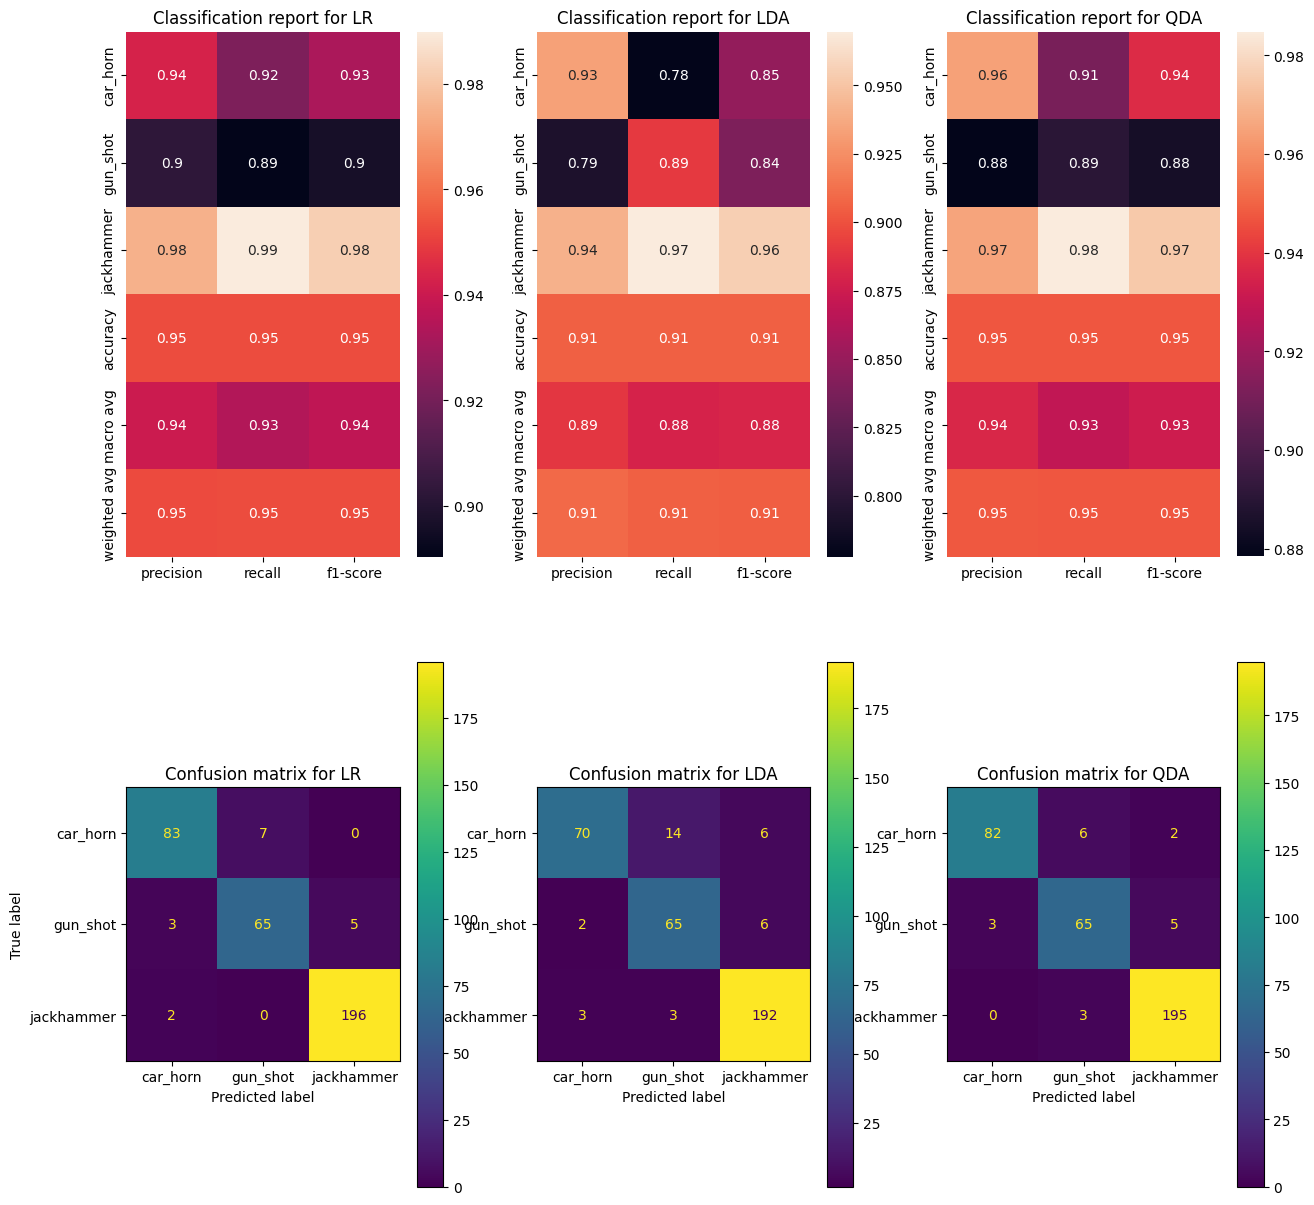

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
import matplotlib.pyplot as plt
import seaborn as sns


models = {'LR':LogisticRegression(), 'LDA': LDA(), 'QDA': QDA()}


f, axes = plt.subplots(2, 3, figsize=(15, 15))

for idx, (name, model) in enumerate(models.items()): # for the imbalanced classes
    col = idx

    # Training the model
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Creating the metrics
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    clf_report = classification_report(y_test, y_pred, output_dict=True)

    # Plotting the metrics
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, ax=axes[0][col])
    axes[0][col].set_title(f'Classification report for {name}')
    
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    display.plot(ax=axes[1][col])
    axes[1][col].set_title(f'Confusion matrix for {name}')


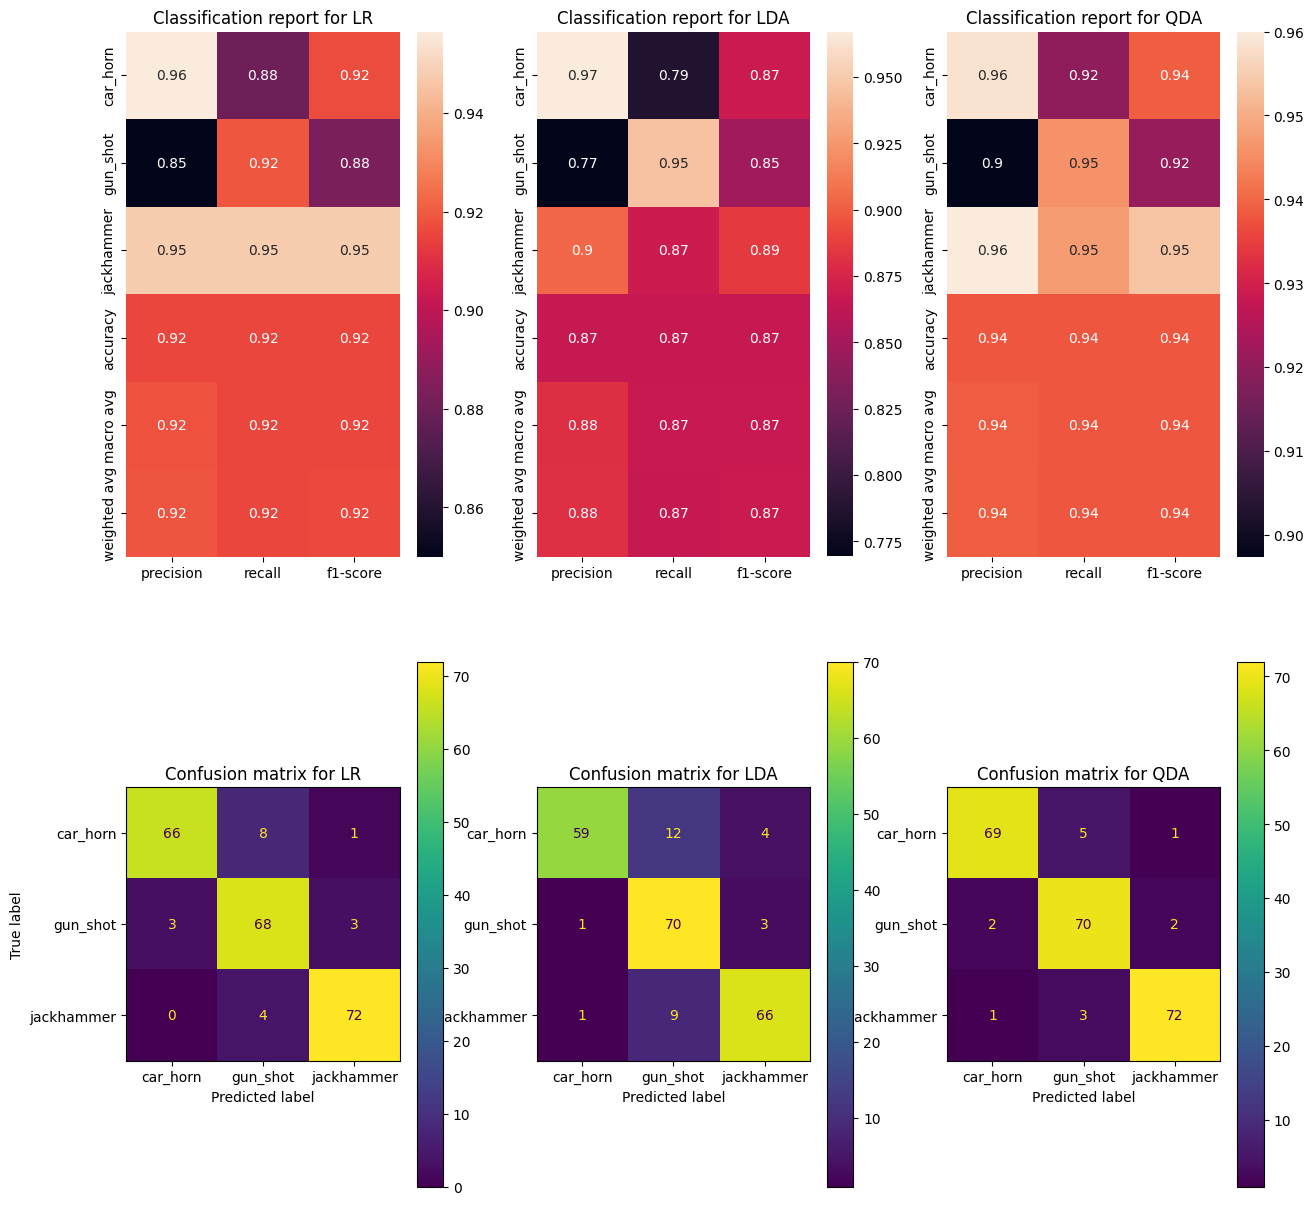

In [19]:
# for the balanced classes

models = {'LR':LogisticRegression(), 'LDA': LDA(), 'QDA': QDA()}


f, axes = plt.subplots(2, 3, figsize=(15, 15))

for idx, (name, model) in enumerate(models.items()): # for the imbalanced classes
    col = idx

    # Training the model
    model = model.fit(X_train_undersampled, y_train_undersampled)
    y_pred = model.predict(X_test_undersampled)

    # Creating the metrics
    cm = confusion_matrix(y_test_undersampled, y_pred, labels=model.classes_)
    clf_report = classification_report(y_test_undersampled, y_pred, output_dict=True)

    # Plotting the metrics
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, ax=axes[0][col])
    axes[0][col].set_title(f'Classification report for {name}')
    
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    display.plot(ax=axes[1][col])
    axes[1][col].set_title(f'Confusion matrix for {name}')

Looking at the results, we see that LDA performed the worst, as it did mistake gunshot with carhorn a lot of the times, decreasing the recall for car_horn and precision for gun_shot quite substantially.
The performace of LR and QDA are quite comparable, altough QDA performed a bit better.  
Based on this test, __QDA__ is the best choice.

Also the undersampling of the dataset didn't change a lot, so we will stick to original dataset to have more samples.

### Cross Validation
We will use the cross validation to evaluate each model's performance.

In [20]:
from sklearn.model_selection import cross_val_score, LeaveOneOut


print('Cross validation with cv=5')
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f'Results for {name}: Mean = {scores.mean()}, std = {scores.std()}')

print('\nCross validation with cv=10')
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10)
    print(f'Results for {name}: Mean = {scores.mean()}, std = {scores.std()}')

print('\nLeave One Out Cross validation (cv=1803)')
for name,model in models.items():
    loo = LeaveOneOut()
    scores = cross_val_score(model, X, y, cv=loo)
    print(f'Result for {name}: Mean = {scores.mean()}, std = {scores.std()}')

Cross validation with cv=5
Results for LR: Mean = 0.8074207448445676, std = 0.12109098986523116
Results for LDA: Mean = 0.753080947983995, std = 0.1235355638590949
Results for QDA: Mean = 0.7053662665435517, std = 0.09264621306584193

Cross validation with cv=10
Results for LR: Mean = 0.8546869244935543, std = 0.09107420613312885
Results for LDA: Mean = 0.8108624923265808, std = 0.10322106405234155
Results for QDA: Mean = 0.7902516881522406, std = 0.11053093425905197

Leave One Out Cross validation (cv=1803)
Result for LR: Mean = 0.9406544647809207, std = 0.23627027461921726
Result for LDA: Mean = 0.8901830282861897, std = 0.31266148537582705
Result for QDA: Mean = 0.9489739323349973, std = 0.22005092156964334


Based on the results from cross validation with $k=5$ and $k=10$, it would seem that __Logistic regression__ is the best choice.  
But assesing the model's performance with _LOOCV_, __QDA__ looks like the best choice, which is in agreement with the Holdout method.

### Bootstrap

In [21]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import numpy as np


num_samples = 1000

bootstrap_scores = {
    'LR': [],
    'LDA': [],
    'QDA': []
}

for name, model in models.items():
    for _ in range(num_samples):
        X_bootstrap, y_bootstrap = resample(X_train, y_train, random_state=np.random.randint(1, 1000))
        
        model.fit(X_bootstrap, y_bootstrap)
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        bootstrap_scores[name].append(accuracy)

In [22]:
for name, scores in bootstrap_scores.items():
    print(f'{name} mean = {np.mean(scores)}')

LR mean = 0.9458060941828255
LDA mean = 0.913797783933518
QDA mean = 0.9528171745152354


From the _Bootstrap_ resampling technique, we once again see that __QDA__ is the best choice for our data.

### Summary:
- **QDA** performed the best in all of the resampling methods, which can be seen in accuracy but also precision and recall.
- All three methods struggled with the **gun_shot** class the most.

## 3. Feature Selection
Can classification models obtain better results if they use just a few features instead of all available
features? Evaluate this hypothesis, using regularization methods.

First, we're experimenting with feature selection methods for supervised machine learning.

In [23]:
import pandas as pd


df = pd.read_csv('all.csv')

X = df.drop(['classe'], axis=1)
y = df['classe']

### Compute the ANOVA F-value for the provided sample. It's a filter based method.

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


# create and fit feature selector
selector = SelectKBest(f_classif, k=5).fit(X, y)

# get columns to keep and create new dataframe with those only, also keep the names of the features
cols_idxs = selector.get_support(indices=True)
features_anova = X.iloc[:,cols_idxs]

Let's have a look on our chosen features.

In [25]:
features_anova.head(10)

media2   media11   desvio0   desvio3   desvio5
0  1.688301 -0.742146  5.495128  2.949682  1.410196
1  1.426739 -0.515518  5.228143  2.075249  2.427163
2  1.931834  0.023983  4.417526  1.241013  2.092606
3  2.151555 -0.066345  5.463763  1.853812  2.086991
4  1.939464 -0.397490  3.637889  2.035043  1.868980
5 -1.926679  0.080584  7.516033  0.428750  0.431152
6 -2.703282  0.151515  7.696106  0.443893  0.814838
7 -0.162309  0.406305  6.069935  1.069494  0.423222
8 -0.996254 -0.949145  3.694728  1.406182  0.321814
9  1.721843  1.175394  8.665190  2.177040  1.980615

In [26]:
# Now for half of the features
selector = SelectKBest(f_classif, k=13).fit(X, y)

# get columns to keep and create new dataframe with those only, also keep the names of the features
cols_idxs = selector.get_support(indices=True)
features_anova_half = X.iloc[:,cols_idxs]

### Now we're choosing features with Recursive Feature Elimination. It's based on feature importance from a Support Vector Classifier. (wrapped-based method)

In [27]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

svc = SVC(kernel="linear") # very basic SVC just to see how it works
rfe = RFE(svc, n_features_to_select=5).fit(X, y)

cols_idxs = rfe.get_support(indices=True)
features_rfe = X.iloc[:,cols_idxs]

In [28]:
features_rfe.head(10)

media2   media12   desvio2   desvio5  desvio11
0  1.688301 -0.550976  2.400241  1.410196  0.564592
1  1.426739 -0.361923  1.923683  2.427163  0.454760
2  1.931834 -0.250745  2.348993  2.092606  0.508423
3  2.151555 -0.172005  2.451514  2.086991  0.393286
4  1.939464 -0.185101  2.440087  1.868980  0.655595
5 -1.926679 -0.355585  1.738356  0.431152  0.586596
6 -2.703282 -0.044545  2.796408  0.814838  0.413624
7 -0.162309  0.458418  0.778339  0.423222  0.284565
8 -0.996254 -0.184435  1.135193  0.321814  0.837011
9  1.721843 -0.237778  2.300760  1.980615  1.565558

Both methods chose media2 as feature to keep.

In [29]:
# For half
svc = SVC(kernel="linear") # very basic SVC just to see how it works
rfe = RFE(svc, n_features_to_select=13).fit(X, y)

cols_idxs = rfe.get_support(indices=True)
features_rfe_half = X.iloc[:,cols_idxs]

### Choosing features based on correlation to the class

In [30]:
import pandas as pd
df = pd.read_csv('all.csv')

# car horn = 0, gunshot =1, jackhammer = 2
df['classe'].mask(df['classe'] == 'car_horn', 0, inplace=True)
df['classe'].mask(df['classe'] == 'gun_shot', 1, inplace=True)
df['classe'].mask(df['classe'] == 'jackhammer', 2, inplace=True)

In [31]:
df = df.astype('float') #so the heatmap function won't have problems with df being dtype='object'

Text(0.5, 1.0, 'Features correlating with classe')

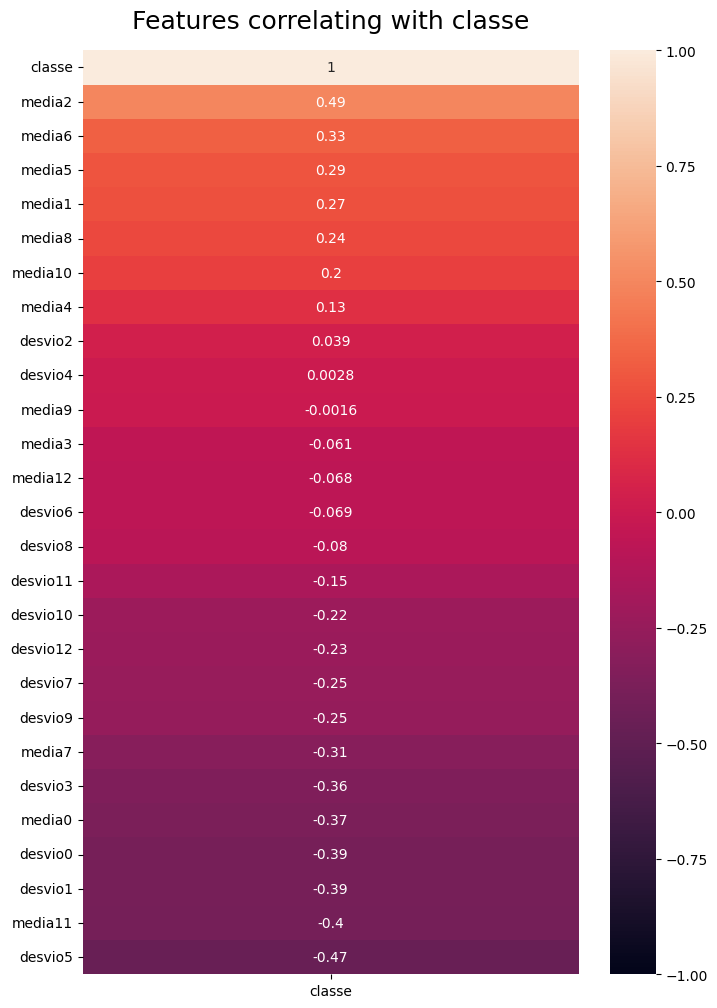

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['classe']].sort_values(by='classe', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features correlating with classe', fontdict={'fontsize':18}, pad=16)

So far, the media2 variable always appears in all methods.

In [33]:
# creating a dataset with top 5 features (highest correlation to the class)
features_corr = df[['media2', 'media5', 'media6', 'media1', 'media8', 'media10']]

In [34]:
features_corr_half = df[['media2', 'media5', 'media6', 'media1', 'media8', 'media10', 'media4', 'desvio2', 'desvio4', 'media9', 'media3', 'media12', 'desvio6']]

### Comparision

In [35]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA 


In [36]:
import pandas as pd
df = pd.read_csv('all.csv')

y = df['classe']

In [37]:
def run_qda(x,y, features_name):
    x_train_chosen, x_test_chosen, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # since QDA is the best shot, lets use only it
    #models = {'LR':LogisticRegression(multi_class='ovr'), 'LDA': LDA(), 'QDA': QDA()}
    models = {'QDA': QDA()}

    result_list = []
    for idx, (name, model) in enumerate(models.items()):
        col = idx
        # Training the model
        model = model.fit(x_train_chosen, y_train)
        y_pred = model.predict(x_test_chosen)

        #print("Model: "+ name)
        r_sq = model.score(x_train_chosen, y_train)
        print(classification_report(y_test, y_pred))

        result_list.append({'model': model, 
                            'features': features_name, 
                            'coefficient of determination': r_sq}
                            )



    return result_list

In [38]:
results_df = [] #list for the results

In [39]:
results_df.append(run_qda(features_anova, y, 'features_anova'))

              precision    recall  f1-score   support

    car_horn       0.81      0.63      0.71        90
    gun_shot       0.64      0.77      0.70        73
  jackhammer       0.94      0.97      0.96       198

    accuracy                           0.84       361
   macro avg       0.80      0.79      0.79       361
weighted avg       0.85      0.84      0.84       361



In [40]:
results_df.append(run_qda(features_rfe, y, 'features_rfe'))

              precision    recall  f1-score   support

    car_horn       0.88      0.54      0.67        90
    gun_shot       0.74      0.84      0.79        73
  jackhammer       0.87      0.98      0.92       198

    accuracy                           0.84       361
   macro avg       0.83      0.79      0.79       361
weighted avg       0.85      0.84      0.83       361



In [41]:
results_df.append(run_qda(features_corr, y, 'features_corr'))

              precision    recall  f1-score   support

    car_horn       0.88      0.62      0.73        90
    gun_shot       0.73      0.71      0.72        73
  jackhammer       0.85      0.96      0.90       198

    accuracy                           0.83       361
   macro avg       0.82      0.77      0.78       361
weighted avg       0.83      0.83      0.82       361



Now let's check how about half of the features.

***On half of variables***

In [42]:
results_df.append(run_qda(features_corr_half, y, 'features_corr_half'))

              precision    recall  f1-score   support

    car_horn       0.97      0.73      0.84        90
    gun_shot       0.81      0.92      0.86        73
  jackhammer       0.92      0.97      0.95       198

    accuracy                           0.90       361
   macro avg       0.90      0.88      0.88       361
weighted avg       0.91      0.90      0.90       361



In [43]:
results_df.append(run_qda(features_anova_half, y, 'features_anova_half'))

              precision    recall  f1-score   support

    car_horn       0.93      0.86      0.89        90
    gun_shot       0.91      0.93      0.92        73
  jackhammer       0.94      0.96      0.95       198

    accuracy                           0.93       361
   macro avg       0.93      0.92      0.92       361
weighted avg       0.93      0.93      0.93       361



In [44]:
results_df.append(run_qda(features_rfe_half, y, 'features_rfe_half'))

              precision    recall  f1-score   support

    car_horn       0.89      0.78      0.83        90
    gun_shot       0.80      0.90      0.85        73
  jackhammer       0.94      0.95      0.95       198

    accuracy                           0.90       361
   macro avg       0.88      0.88      0.88       361
weighted avg       0.90      0.90      0.90       361



### Lasso

In [45]:
from sklearn.model_selection import train_test_split

df2 = df.copy(deep=True)

df2['classe'].mask(df2['classe'] == 'car_horn', 0, inplace=True)
df2['classe'].mask(df2['classe'] == 'gun_shot', 1, inplace=True)
df2['classe'].mask(df2['classe'] == 'jackhammer', 2, inplace=True)

y2 = df2['classe']
y = df['classe']

X = df.drop(['classe'], axis=1)

x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=42) # classes are only 0 1 and 2, not string names
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold

In [47]:
# lets create parameters to be tested on GridSearchCV to find the best alpha parameterr
params = {"alpha":np.arange(0.0000000001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)


lasso = Lasso()
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y2)
print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 1e-10}


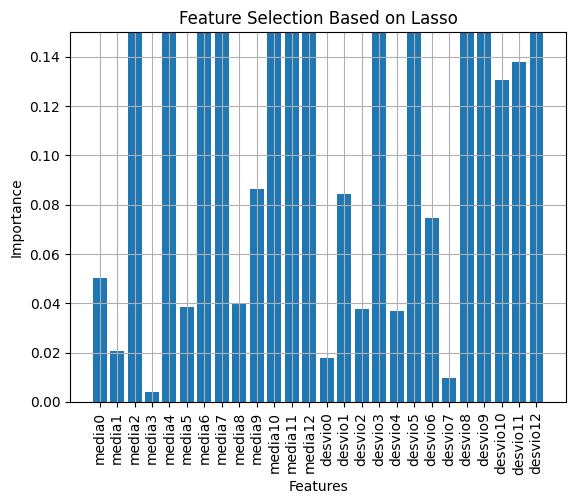

In [48]:
names=df.drop("classe", axis=1).columns

# calling the model with the best parameter from grid seearch
lasso1 = Lasso(alpha=0.0000000001)
lasso1.fit(x_train, y_train2)

# Using np.abs() to make coefficients positive (!)
lasso1_coef = np.abs(lasso1.coef_)

# plotting the column names with their importance
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

In [49]:
# subsetting the features which has more than 0.1 importance 

feature_subset=np.array(names)[lasso1_coef>0.1]
print("Selected Feature Columns: {}".format(feature_subset))

Selected Feature Columns: ['media2' 'media4' 'media6' 'media7' 'media10' 'media11' 'media12'
 'desvio3' 'desvio5' 'desvio8' 'desvio9' 'desvio10' 'desvio11' 'desvio12']


In [50]:
features_lasso = df[feature_subset] #making subdataset with chosen features
features_lasso


media2    media4    media6    media7   media10   media11   media12  \
0     1.688301  1.043490 -0.767414 -1.614851 -0.400619 -0.742146 -0.550976   
1     1.426739  0.930528 -0.332971 -0.714048 -0.069456 -0.515518 -0.361923   
2     1.931834  0.610031 -0.295343 -0.319409 -0.305191  0.023983 -0.250745   
3     2.151555  1.334776 -0.546990 -0.359816 -0.501346 -0.066345 -0.172005   
4     1.939464  1.823046 -1.132419 -0.942162 -0.330539 -0.397490 -0.185101   
...        ...       ...       ...       ...       ...       ...       ...   
1798  2.750922  1.024479  0.886541 -0.118320 -0.341208 -0.339844 -0.057822   
1799  2.582896  1.154879  0.875659 -0.034349 -0.376332 -0.360549 -0.146454   
1800  2.829893  1.173357  1.047330 -0.043917 -0.465519 -0.380075  0.000949   
1801  2.943084  1.277754  0.916639  0.034631 -0.512607 -0.335728  0.005052   
1802  2.701642  1.297340  0.595156  0.151981 -0.395780 -0.302101 -0.242188   

       desvio3   desvio5   desvio8   desvio9  desvio10  desvio11  desvio12  
0     2.949682  1.410196  0.601646  0.769883  0.416295  0.564592  0.349746  
1     2.075249  2.427163  0.766374  0.758806  0.532139  0.454760  0.376218  
2     1.241013  2.092606  0.439129  1.018796  0.385876  0.508423  0.394474  
3     1.853812  2.086991  0.497059  0.950790  0.567042  0.393286  0.332839  
4     2.035043  1.868980  1.018720  0.892772  0.453530  0.655595  0.546549  
...        ...       ...       ...       ...       ...       ...       ...  
1798  0.649900  0.412725  0.557721  0.840733  0.464887  0.440423  0.380430  
1799  0.621607  0.398208  0.452882  0.911756  0.463412  0.399843  0.360946  
1800  0.665319  0.411532  0.590638  0.793596  0.592795  0.512649  0.391974  
1801  0.844433  0.484439  0.648040  0.664538  0.634720  0.484224  0.366048  
1802  0.912520  0.484458  0.454702  0.660793  0.426852  0.351945  0.370745  

[1803 rows x 14 columns]

In [51]:
results_df.append(run_qda(features_lasso, y, 'features_lasso')) # running model on this new dataset

              precision    recall  f1-score   support

    car_horn       0.89      0.79      0.84        90
    gun_shot       0.78      0.92      0.84        73
  jackhammer       0.96      0.95      0.96       198

    accuracy                           0.90       361
   macro avg       0.88      0.89      0.88       361
weighted avg       0.91      0.90      0.90       361



### Ridge classifier

In [52]:
from sklearn.linear_model import RidgeClassifier 
from sklearn.metrics import confusion_matrix

ridge = RidgeClassifier()
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

print(confusion_matrix(y_test, y_pred_ridge))


[[ 72  11   7]
 [  2  65   6]
 [  2   1 195]]


In [53]:
from sklearn.feature_selection import SelectFromModel


selector_ridge = SelectFromModel(RidgeClassifier())
selector_ridge.fit(x_train, np.ravel(y_train, order='C'))
selector_ridge.get_support() #false: feature is not important enough

array([False, False, False, False,  True, False, False,  True, False,
        True, False,  True,  True, False, False, False,  True, False,
        True, False, False, False,  True,  True,  True,  True])

In [54]:
selected_feat_ridge = X_train.columns[(selector_ridge.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat_ridge)))
print('features with coefficients shrank to zero: {}'.format(np.sum(selector_ridge.estimator_.coef_ == 0)))

total features: 26
selected features: 11
features with coefficients shrank to zero: 0


In [55]:
selected_feat_ridge

Index(['media4', 'media7', 'media9', 'media11', 'media12', 'desvio3',
       'desvio5', 'desvio9', 'desvio10', 'desvio11', 'desvio12'],
      dtype='object')

In [56]:
features_ridge = df.loc[:, selected_feat_ridge]

In [57]:
features_ridge.head(5)

media4    media7    media9   media11   media12   desvio3   desvio5  \
0  1.043490 -1.614851 -0.029143 -0.742146 -0.550976  2.949682  1.410196   
1  0.930528 -0.714048 -0.898208 -0.515518 -0.361923  2.075249  2.427163   
2  0.610031 -0.319409 -1.040936  0.023983 -0.250745  1.241013  2.092606   
3  1.334776 -0.359816 -1.013008 -0.066345 -0.172005  1.853812  2.086991   
4  1.823046 -0.942162 -0.769522 -0.397490 -0.185101  2.035043  1.868980   

    desvio9  desvio10  desvio11  desvio12  
0  0.769883  0.416295  0.564592  0.349746  
1  0.758806  0.532139  0.454760  0.376218  
2  1.018796  0.385876  0.508423  0.394474  
3  0.950790  0.567042  0.393286  0.332839  
4  0.892772  0.453530  0.655595  0.546549

In [58]:
results_df.append(run_qda(features_ridge, y, 'features_ridge'))

              precision    recall  f1-score   support

    car_horn       0.84      0.70      0.76        90
    gun_shot       0.77      0.95      0.85        73
  jackhammer       0.90      0.89      0.90       198

    accuracy                           0.86       361
   macro avg       0.84      0.85      0.84       361
weighted avg       0.86      0.86      0.85       361



***On all data***

In [59]:
x = df.drop(['classe'], axis=1)

results_df.append(run_qda(x, y, 'all_features'))

              precision    recall  f1-score   support

    car_horn       0.96      0.91      0.94        90
    gun_shot       0.88      0.89      0.88        73
  jackhammer       0.97      0.98      0.97       198

    accuracy                           0.95       361
   macro avg       0.94      0.93      0.93       361
weighted avg       0.95      0.95      0.95       361



In [60]:
results_df =  [item for row in results_df for item in row] #flatten the list

In [61]:
df_result = pd.DataFrame.from_dict(results_df)
df_result.sort_values(by='coefficient of determination', ascending=False)

model             features  \
8  QuadraticDiscriminantAnalysis()         all_features   
4  QuadraticDiscriminantAnalysis()  features_anova_half   
5  QuadraticDiscriminantAnalysis()    features_rfe_half   
6  QuadraticDiscriminantAnalysis()       features_lasso   
3  QuadraticDiscriminantAnalysis()   features_corr_half   
7  QuadraticDiscriminantAnalysis()       features_ridge   
0  QuadraticDiscriminantAnalysis()       features_anova   
1  QuadraticDiscriminantAnalysis()         features_rfe   
2  QuadraticDiscriminantAnalysis()        features_corr   

   coefficient of determination  
8                      0.957004  
4                      0.923717  
5                      0.912621  
6                      0.898058  
3                      0.896671  
7                      0.834951  
0                      0.829404  
1                      0.816921  
2                      0.807212

### Summary: <br>
- The best results are performed on **all** available features
- The worst result is preformed on top 5 features chosen by correlation
- media2 was chosen by almost every method

## 4. Learning a non-linear function


Use Generalized Additive Models (GAMs) to perform binary classification of your dataset. To do
this, you must try to build a model that allows you, among the three classes under analysis, to
identify one of them. You should test the three hypotheses and present only the one with the best
results. To validate the performance of the models, use cross-validation. Evaluate the results using
the evaluation metrics that you consider appropriate.


**We'll try to indentify whenever sound is a car_horn (1.0) or not (0.0)**

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('all.csv')

#change the class names to 1/0 values
df['classe'].mask(df['classe'] == 'car_horn', 1.0, inplace=True)
df['classe'].mask(df['classe'] == 'gun_shot', 0.0, inplace=True)
df['classe'].mask(df['classe'] == 'jackhammer', 0.0, inplace=True)

y = df[['classe']]
x = df.drop(['classe'], axis=1)

x_train_df,x_test_df, y_train_df, y_test_df = train_test_split(x, y, test_size=0.2, random_state=42)

x_train = x_train_df.to_numpy()
x_test = x_test_df.to_numpy()
y_train = y_train_df.to_numpy()
y_test = y_test_df.to_numpy()

**Make sure there is no null values, so gam.grindsearch will no throw 'SVD did not coverage'**

In [63]:
pd.isnull(df).any()

media0      False
media1      False
media2      False
media3      False
media4      False
media5      False
media6      False
media7      False
media8      False
media9      False
media10     False
media11     False
media12     False
desvio0     False
desvio1     False
desvio2     False
desvio3     False
desvio4     False
desvio5     False
desvio6     False
desvio7     False
desvio8     False
desvio9     False
desvio10    False
desvio11    False
desvio12    False
classe      False
dtype: bool

**Prepare function for plotting**

In [64]:
import matplotlib.pyplot as plt

def plot_partial_dependence(gam_model, nr_of_plots):
    titles = list(x.columns)
    plt.figure()
    fig, axs = plt.subplots(1,nr_of_plots,figsize=(20, 5))
    for i, ax in enumerate(axs):
        XX = gam_model.generate_X_grid(term=i)
        ax.plot(XX[:, i], gam_model.partial_dependence(term=i, X=XX))
        ax.plot(XX[:, i], gam_model.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
        if i == 0:
            ax.set_ylim(-30,30)
        ax.set_title(titles[i])

Here we use LogisticGAM, which uses a logit link function and binomial distribution, with 26 spline terms, one for each of the features

In [65]:
from pygam import LogisticGAM, s, f, te
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [66]:
gam_26_splines_gridsearch = LogisticGAM(n_splines=26).gridsearch(x_train, y_train)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


  9% (1 of 11) |##                       | Elapsed Time: 0:00:10 ETA:   0:01:43
 18% (2 of 11) |####                     | Elapsed Time: 0:00:13 ETA:   0:00:27
 27% (3 of 11) |######                   | Elapsed Time: 0:00:16 ETA:   0:00:25
 36% (4 of 11) |#########                | Elapsed Time: 0:00:19 ETA:   0:00:22
 45% (5 of 11) |###########              | Elapsed Time: 0:00:23 ETA:   0:00:20
 54% (6 of 11) |#############            | Elapsed Time: 0:00:26 ETA:   0:00:17
 63% (7 of 11) |###############          | Elapsed Time: 0:00:30 ETA:   0:00:13
 72% (8 of 11) |##################       | Elapsed Time: 0:00:33 ETA:   0:00:09
 81% (9 of 11) |####################     | Elapsed Time: 0:00:36 ETA:   0:00:05
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:38 ETA:   0:00:02
100% (11 of 11) |########################| Elapsed Time: 0:00:41 Time:  0:00:41


In [67]:
gam_26_splines_gridsearch.accuracy(x_test, y_test)

0.9722991689750693

In [68]:
gam_26_splines_gridsearch.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                    127.0418
Link Function:                        LogitLink Log Likelihood:                                    -2.7462
Number of Samples:                         1442 AIC:                                              259.5761
                                                AICc:                                             284.7448
                                                UBRE:                                               2.2505
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.9965
Feature Function                  Lam

In [69]:
import matplotlib.pyplot as plt

# function to plot all 
def plot_all(gam):
    for i, term in enumerate(gam.terms):
        if term.isintercept:
            continue

        XX = gam.generate_X_grid(term=i)
        pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

        plt.figure()
        plt.plot(XX[:, term.feature], pdep)
        plt.plot(XX[:, term.feature], confi, c='r', ls='--')
        plt.title(repr(term))
        plt.show()

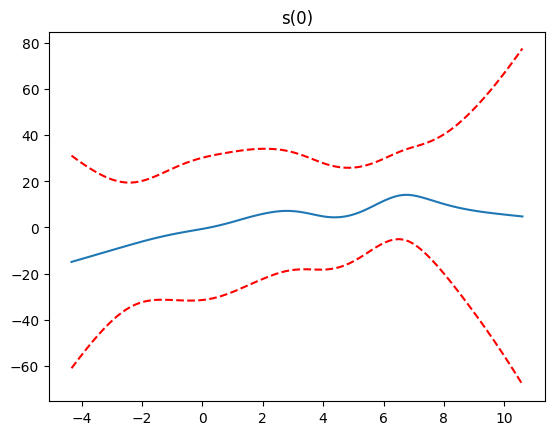

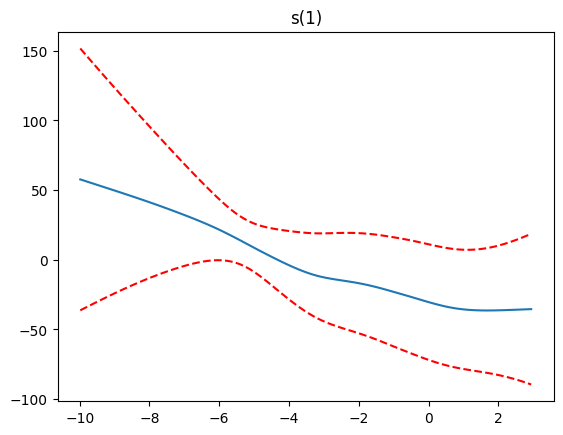

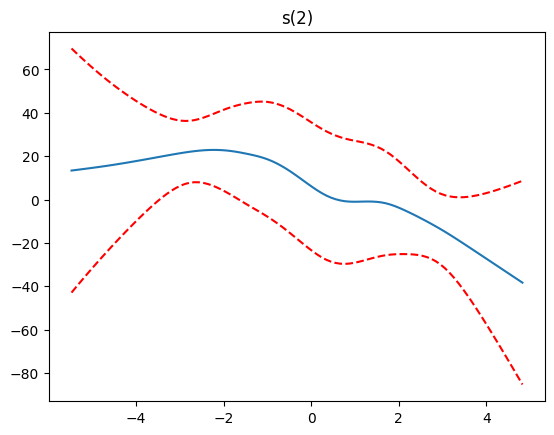

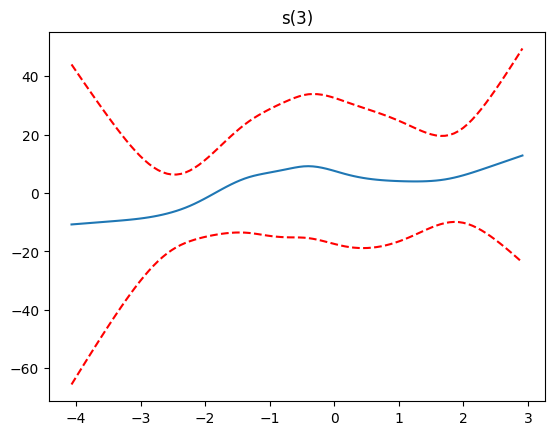

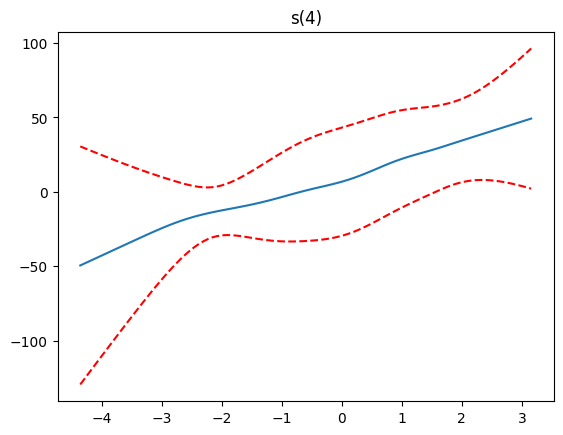

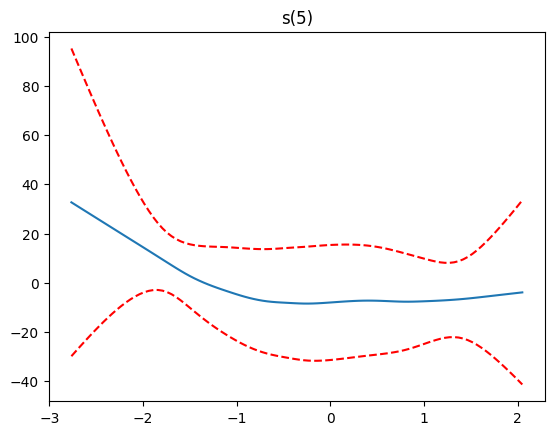

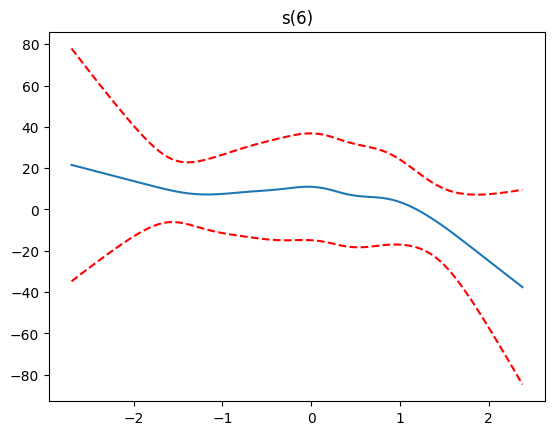

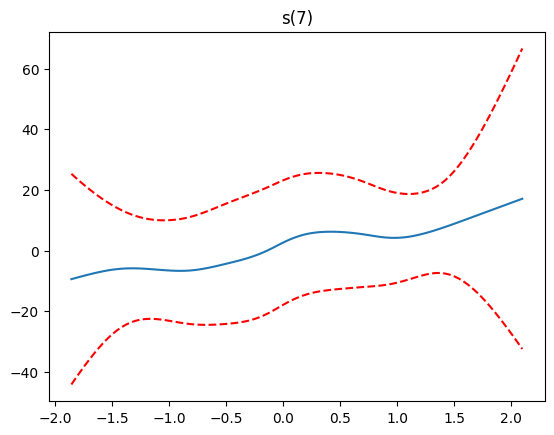

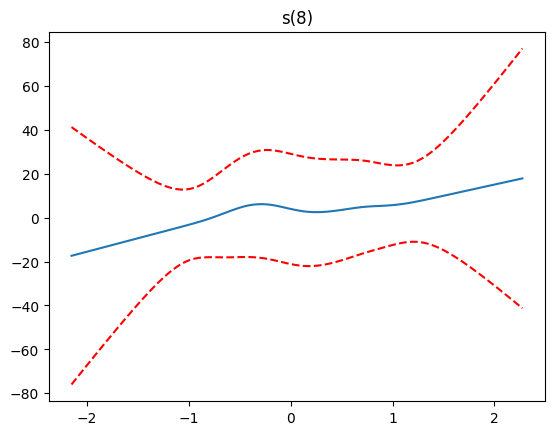

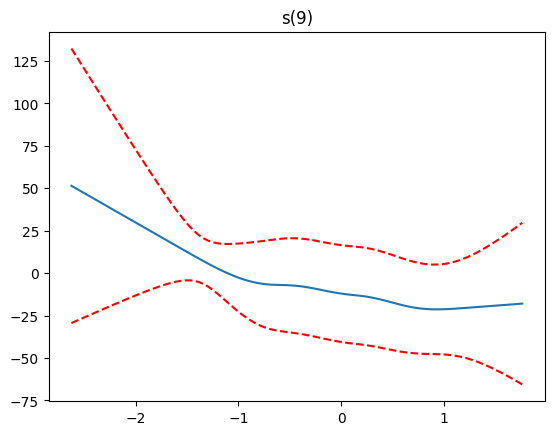

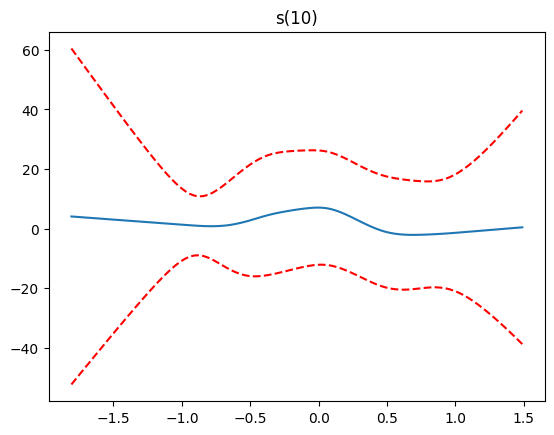

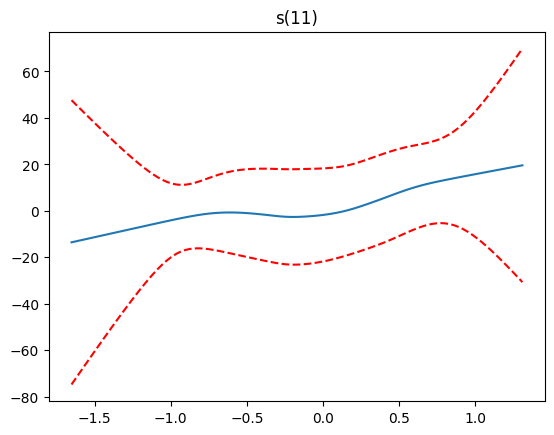

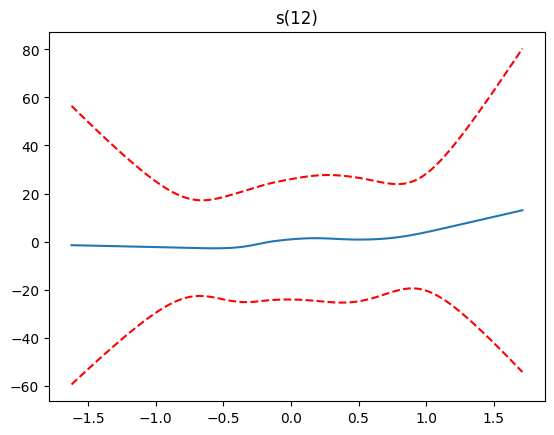

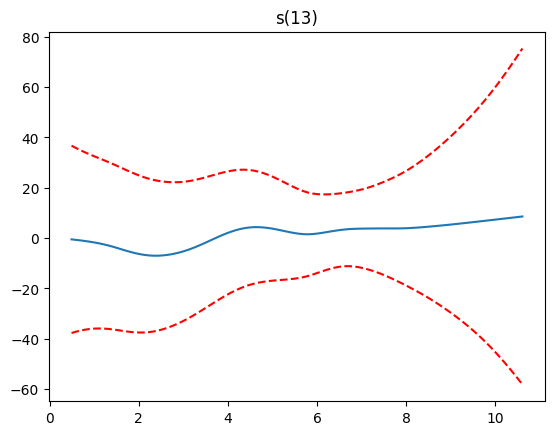

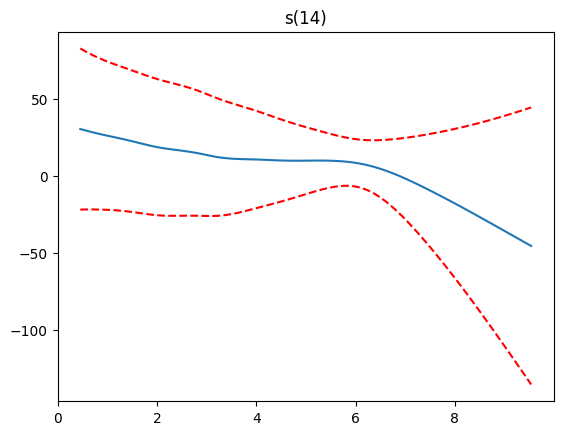

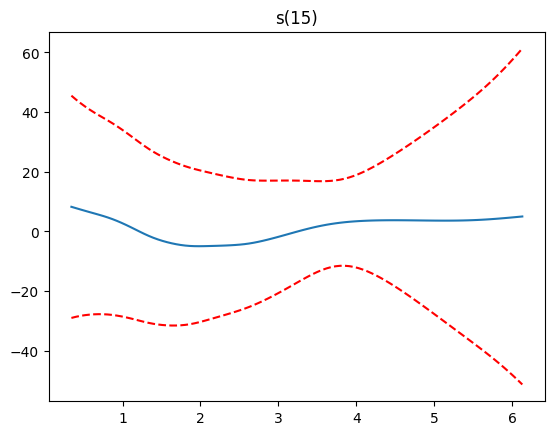

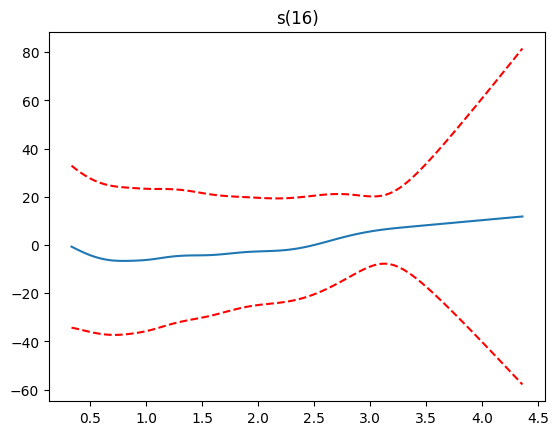

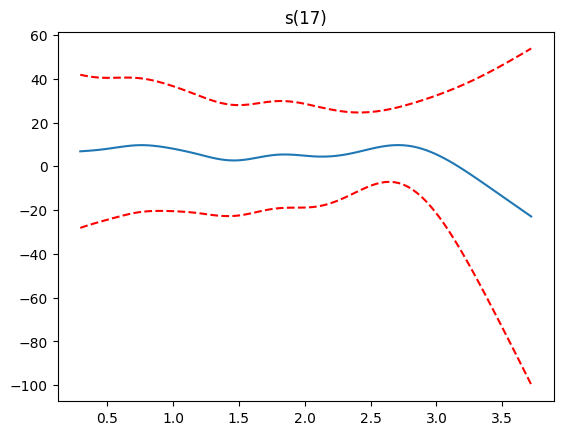

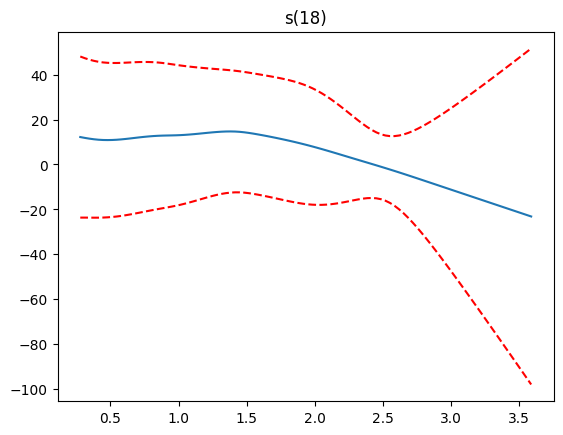

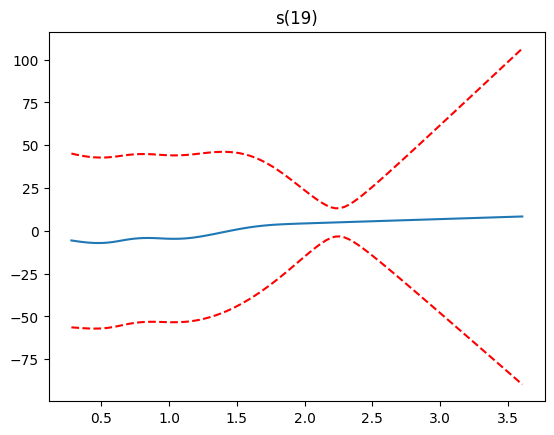

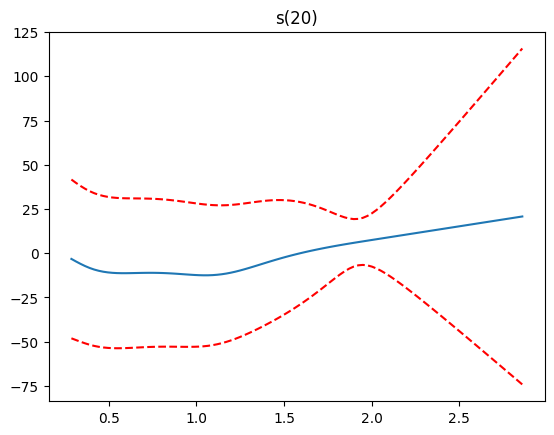

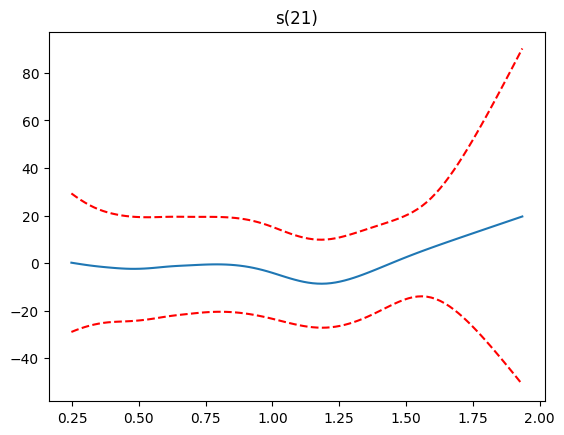

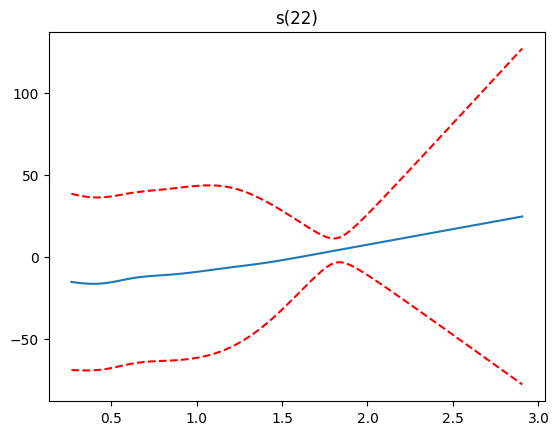

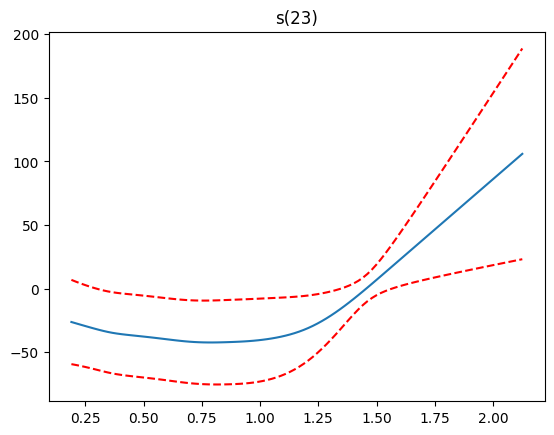

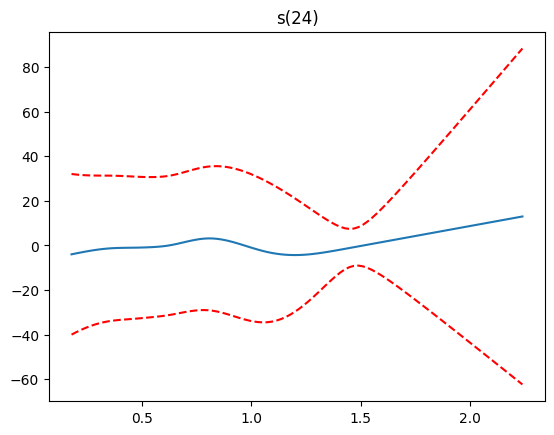

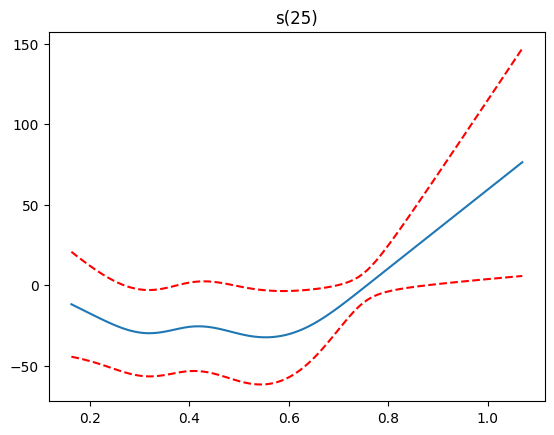

In [70]:
plot_all(gam_26_splines_gridsearch)

<Figure size 640x480 with 0 Axes>

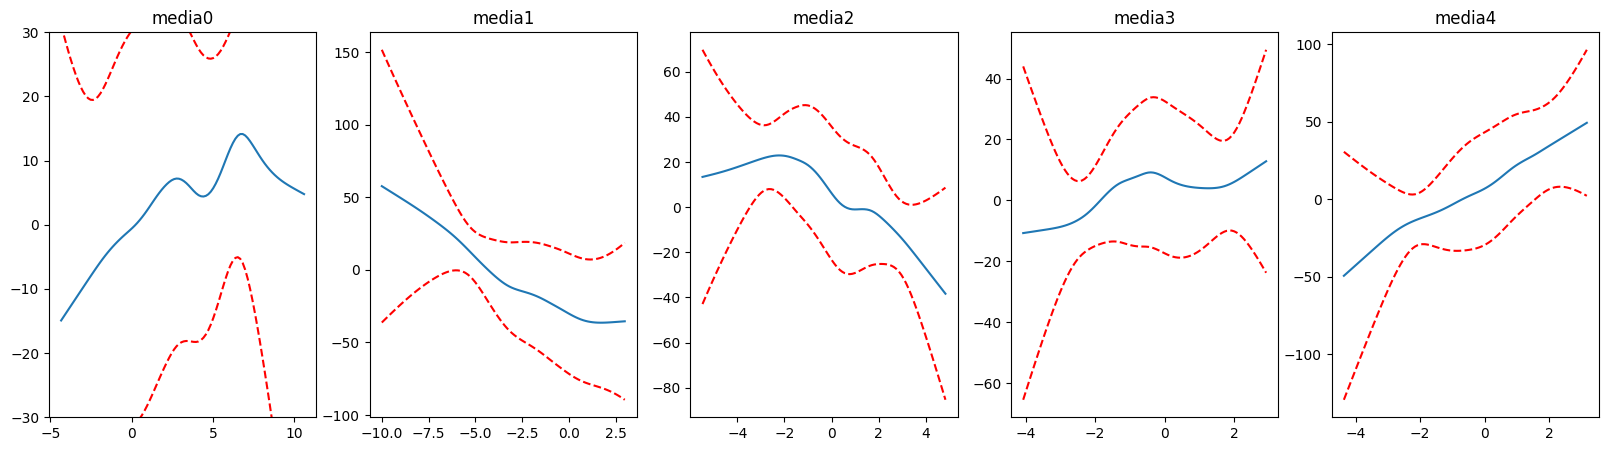

In [71]:
plot_partial_dependence(gam_26_splines_gridsearch,5)

**Let’s perform a grid-search over multiple lam values to see if we can improve our model.
We will seek the model with the lowest generalized cross-validation (GCV) score.**

In [72]:
n_features = 26 # number of features used in the model
lams = np.logspace(-5,5,20) * n_features

In [73]:
gam = LogisticGAM()

In [74]:
gam.gridsearch(x_train, y_train, lam=lams)

  0% (0 of 20) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


  5% (1 of 20) |#                        | Elapsed Time: 0:00:06 ETA:   0:02:09
 10% (2 of 20) |##                       | Elapsed Time: 0:00:08 ETA:   0:01:18
 15% (3 of 20) |###                      | Elapsed Time: 0:00:10 ETA:   0:00:33
 20% (4 of 20) |#####                    | Elapsed Time: 0:00:12 ETA:   0:00:32
 25% (5 of 20) |######                   | Elapsed Time: 0:00:14 ETA:   0:00:30
 30% (6 of 20) |#######                  | Elapsed Time: 0:00:16 ETA:   0:00:28
 35% (7 of 20) |########                 | Elapsed Time: 0:00:18 ETA:   0:00:26
 40% (8 of 20) |##########               | Elapsed Time: 0:00:21 ETA:   0:00:24
 45% (9 of 20) |###########              | Elapsed Time: 0:00:23 ETA:   0:00:23
 50% (10 of 20) |############            | Elapsed Time: 0:00:25 ETA:   0:00:20
 55% (11 of 20) |#############           | Elapsed Time: 0:00:26 ETA:   0:00:17
 60% (12 of 20) |##############          | Elapsed Time: 0:00:28 ETA:   0:00:13
 65% (13 of 20) |###############        

LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + s(24) + s(25) + intercept,
   tol=0.0001, verbose=False)

In [75]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     126.475
Link Function:                        LogitLink Log Likelihood:                                    -1.7179
Number of Samples:                         1442 AIC:                                              256.3858
                                                AICc:                                             281.3223
                                                UBRE:                                                2.248
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.9978
Feature Function                  Lam

In [76]:
gam.accuracy(x_test, y_test) #takie samo? nie wiem czy acc wywoływane znowu ma w ogóle sens

0.9695290858725761

For high-dimensional search-spaces, it is sometimes a good idea to try a randomized search.

In [77]:
lams_rnd = np.random.rand(100, 26) # random points on [0, 1], with shape (100, 26)
lams_rnd = lams_rnd * 6 - 3 # shift values to -3, 3
lams_rnd = 10 ** lams_rnd # transforms values to 1e-3, 1e3

In [78]:
lams_rnd.shape

(100, 26)

In [79]:
random_gam = LogisticGAM(n_splines=26).gridsearch(x_train, y_train, lam=lams_rnd)

  0% (0 of 100) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--


  1% (1 of 100) |                        | Elapsed Time: 0:00:08 ETA:   0:13:45
  2% (2 of 100) |                        | Elapsed Time: 0:00:11 ETA:   0:04:54
  3% (3 of 100) |                        | Elapsed Time: 0:00:27 ETA:   0:25:23
  4% (4 of 100) |                        | Elapsed Time: 0:00:36 ETA:   0:15:31
  5% (5 of 100) |#                       | Elapsed Time: 0:00:49 ETA:   0:20:35
  6% (6 of 100) |#                       | Elapsed Time: 0:01:02 ETA:   0:20:35
  7% (7 of 100) |#                       | Elapsed Time: 0:01:09 ETA:   0:10:33
  8% (8 of 100) |#                       | Elapsed Time: 0:01:13 ETA:   0:05:24
  9% (9 of 100) |##                      | Elapsed Time: 0:01:20 ETA:   0:11:42
 10% (10 of 100) |##                     | Elapsed Time: 0:01:33 ETA:   0:18:36
 11% (11 of 100) |##                     | Elapsed Time: 0:01:36 ETA:   0:05:17
 12% (12 of 100) |##                     | Elapsed Time: 0:01:49 ETA:   0:18:18
 13% (13 of 100) |##                    

In [80]:
random_gam.accuracy(x_test, y_test)

0.9556786703601108

In [81]:
random_gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                    110.3932
Link Function:                        LogitLink Log Likelihood:                                    -9.4116
Number of Samples:                         1442 AIC:                                              239.6096
                                                AICc:                                              258.442
                                                UBRE:                                               2.2274
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.988
Feature Function                  Lam

In [82]:
gam_3 = LogisticGAM(s(0) + s(1) + s(2),dtype='categorical').gridsearch(x_train, y_train)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


<Figure size 640x480 with 0 Axes>

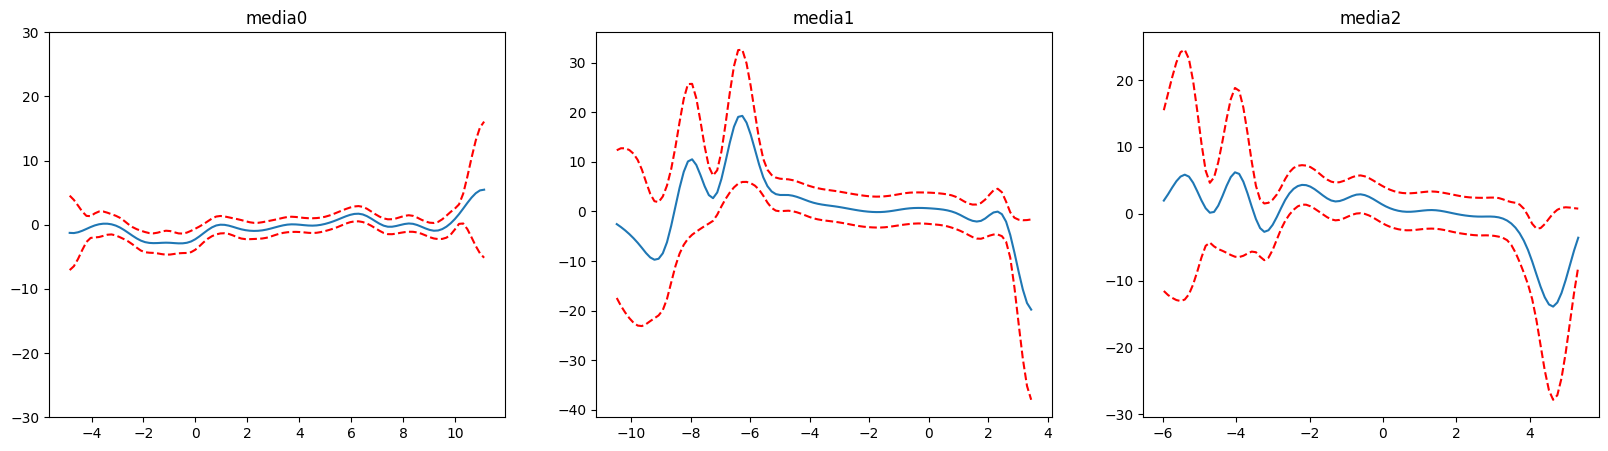

In [83]:
plot_partial_dependence(gam_3,3)

In [84]:
gam_3.accuracy(x_test, y_test)

0.8781163434903048

In [85]:
gam_3.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     46.6896
Link Function:                        LogitLink Log Likelihood:                                   -467.676
Number of Samples:                         1442 AIC:                                             1028.7312
                                                AICc:                                            1032.0642
                                                UBRE:                                               2.7393
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4053
Feature Function                  Lam

In [86]:
gam_5 = LogisticGAM(s(0) + s(1) + s(2) + s(3)+s(4))
gam_5.fit(x_train, y_train)

LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + intercept, tol=0.0001, 
   verbose=False)

<Figure size 640x480 with 0 Axes>

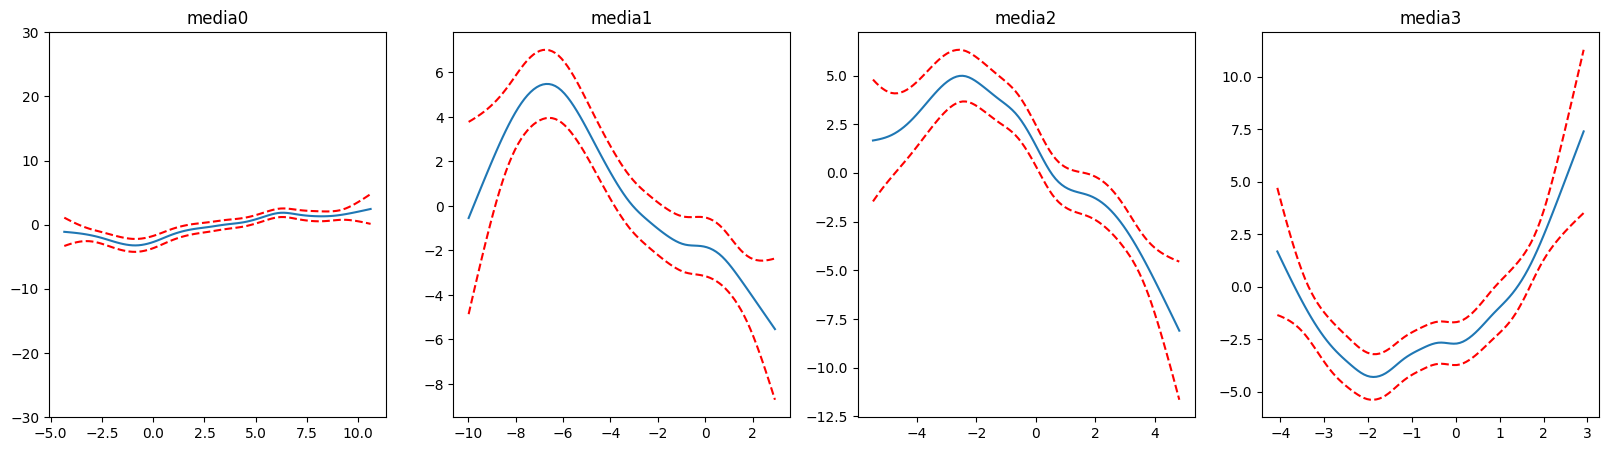

In [87]:
plot_partial_dependence(gam_5,4)

In [88]:
gam_5.accuracy(x_test, y_test)

0.9196675900277008

In [89]:
gam_5.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     36.3758
Link Function:                        LogitLink Log Likelihood:                                  -338.1479
Number of Samples:                         1442 AIC:                                              749.0473
                                                AICc:                                              751.091
                                                UBRE:                                               2.5396
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                     0.57
Feature Function                  Lam

### Cross validation: which model is the best

In [90]:
models = {      'gam_26_splines' : gam_26_splines_gridsearch, 
                'random_gam' : random_gam,
                'gam_3': gam_3, 
                'gam_5': gam_5,
                'gam':gam 
        }

In [91]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

print('Cross validation with cv=5')
for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=5)
    print(f'Results for {name}: Mean = {scores.mean()}, std = {scores.std()}')

print('\nCross validation with cv=10')
for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=10)
    print(f'Results for {name}: Mean = {scores.mean()}, std = {scores.std()}')

print('\nLeave One Out Cross validation')
for name,model in models.items():
    loo = LeaveOneOut()
    scores = cross_val_score(model, x, y, cv=loo)
    print(f'Result for {name}: Mean = {scores.mean()}, std = {scores.std()}')

Cross validation with cv=5
Results for gam_26_splines: Mean = 0.7623268698060942, std = 0.38808221664599063
Results for random_gam: Mean = 0.7623268698060942, std = 0.38808221664599063
Results for gam_3: Mean = 0.7623268698060942, std = 0.38808221664599063


Results for gam_5: Mean = 0.7623268698060942, std = 0.38808221664599063
Results for gam: Mean = 0.7623268698060942, std = 0.38808221664599063

Cross validation with cv=10
Results for gam_26_splines: Mean = 0.7629834254143646, std = 0.39689471061256415
Results for random_gam: Mean = 0.7629834254143646, std = 0.39689471061256415
Results for gam_3: Mean = 0.7629834254143646, std = 0.39689471061256415
Results for gam_5: Mean = 0.7629834254143646, std = 0.39689471061256415
Results for gam: Mean = 0.7629834254143646, std = 0.39689471061256415

Leave One Out Cross validation
Result for gam_26_splines: Mean = 0.762063227953411, std = 0.42582022562888977
Result for random_gam: Mean = 0.762063227953411, std = 0.42582022562888977
Result for gam_3: Mean = 0.762063227953411, std = 0.42582022562888977
Result for gam_5: Mean = 0.762063227953411, std = 0.42582022562888977
Result for gam: Mean = 0.762063227953411, std = 0.42582022562888977


### Evaluation metrics

In [92]:
for name, model in models.items():
    print(f'Results for {name}: accuracy = {model.accuracy(x_test, y_test)}')

Results for gam_26_splines: accuracy = 0.9722991689750693
Results for random_gam: accuracy = 0.9556786703601108
Results for gam_3: accuracy = 0.8781163434903048
Results for gam_5: accuracy = 0.9196675900277008
Results for gam: accuracy = 0.9695290858725761


### Summary:
- number of splines affects the results: for our dataset gam with splines for each of the features performed the best
- gam with defined lams (λ) did as well as gam with splines for each feature, getting results at 0.969 and 0.972 respectively ('gam' and 'gam_26_splines')
- the smaller number of splines, the worse accuracy 

## 5. Decision Trees and Random Forest

### Decision Trees

We will build a decision tree model and evaluate its performance.

1.0
0.8947368421052632
[[ 72   9   9]
 [  9  60   4]
 [  6   1 191]]
              precision    recall  f1-score   support

    car_horn       0.83      0.80      0.81        90
    gun_shot       0.86      0.82      0.84        73
  jackhammer       0.94      0.96      0.95       198

    accuracy                           0.89       361
   macro avg       0.87      0.86      0.87       361
weighted avg       0.89      0.89      0.89       361



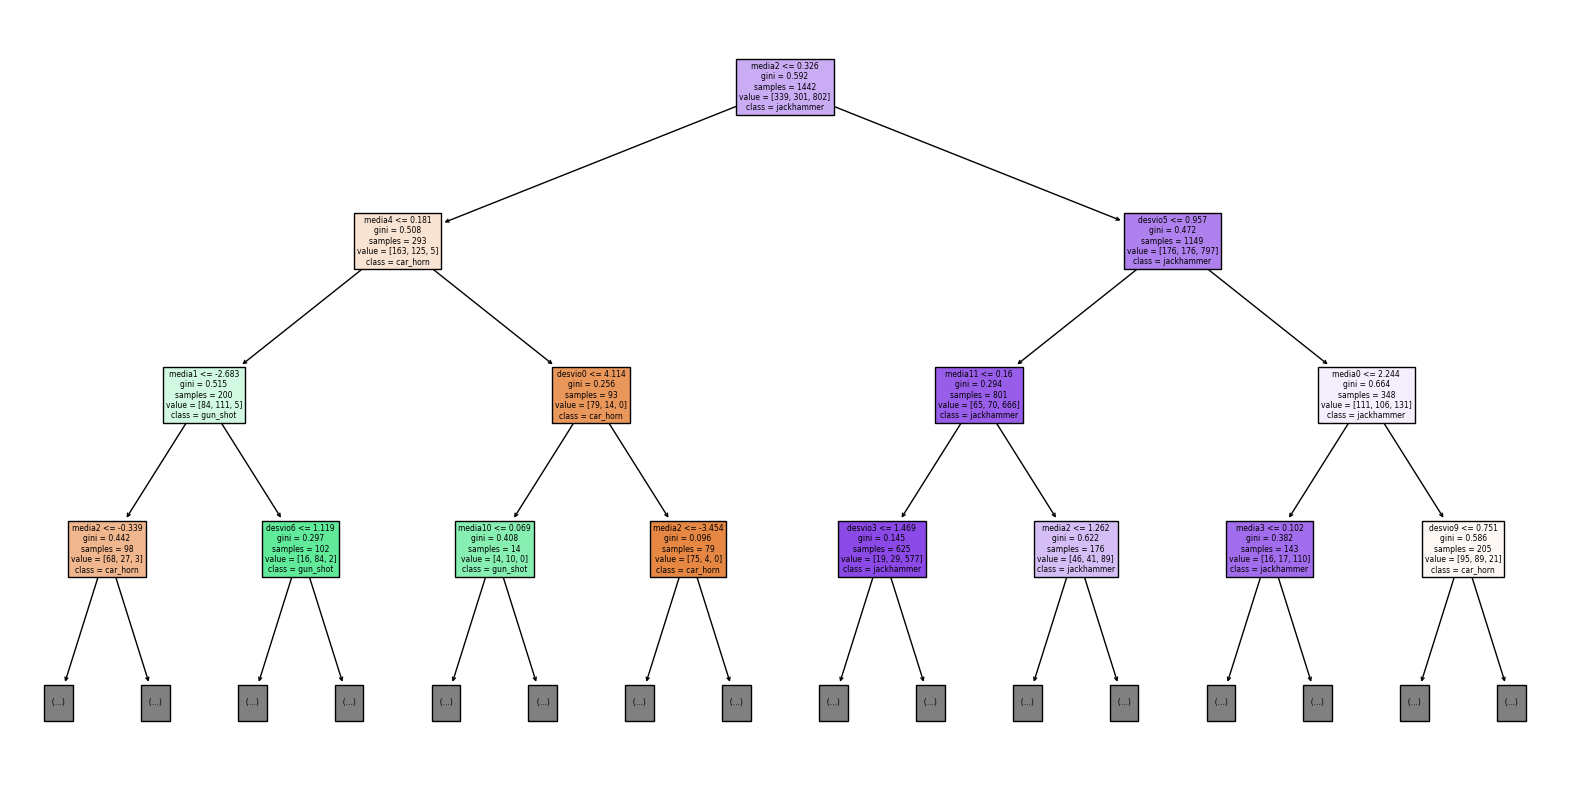

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


df = pd.read_csv('all.csv')

X_train, X_test, y_train, y_test = train_test_split(df.drop(['classe'], axis=1), df['classe'], test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X_train.columns, class_names=['car_horn', 'gun_shot', 'jackhammer'], filled=True, max_depth=3)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

As we can see, the result is not bad, although models like QDA and even Logistic Regression performed slightly better. Let's try to tune the Decision Tree hyperparameters to see if we can obtain better results.  
For the decision tree, we will do the hyperparameter tuning manually.

### Tuning the hyperparameters
__max_depth__

In [94]:
clf.tree_.max_depth

13

In [95]:
def decision_tree_classifier(X_train, y_train, X_test, y_test, max_depth):
    clf = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    print(f'Training set accuracy: {accuracy_score(y_train, y_train_pred)}')
    print(f'Test set accuracy: {accuracy_score(y_test, y_pred)}')
    print(confusion_matrix(y_test, y_pred))  
    print(classification_report(y_test, y_pred))

In [96]:
decision_tree_classifier(X_train, y_train, X_test, y_test, 3)

Training set accuracy: 0.768377253814147
Test set accuracy: 0.7645429362880887
[[ 62   7  21]
 [ 31  21  21]
 [  3   2 193]]
              precision    recall  f1-score   support

    car_horn       0.65      0.69      0.67        90
    gun_shot       0.70      0.29      0.41        73
  jackhammer       0.82      0.97      0.89       198

    accuracy                           0.76       361
   macro avg       0.72      0.65      0.66       361
weighted avg       0.75      0.76      0.74       361



Setting the max depth to 3 does not improve the result. On the contrary, the performace is worse for both train and test set.  
We know that naturally, our model has max depth of 16. We will try all the possible depths and observe the results, if we find any depth that performs better.

The highest the accuracy of 0.9030470914127424 is with depth 9


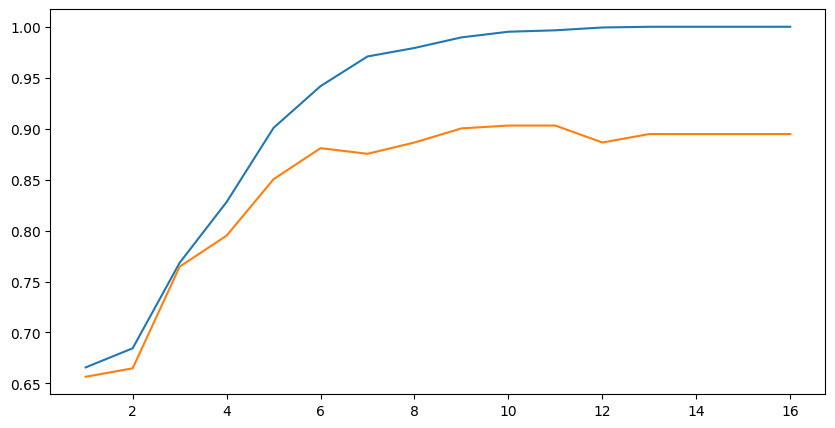

In [97]:
results = []
for i in range(1, 17):
    clf = DecisionTreeClassifier(random_state=42, max_depth=i)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    results.append((i, accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_pred)))

results_df = pd.DataFrame(results, columns=['max_depth', 'train_accuracy', 'test_accuracy'])

plt.figure(figsize=(10, 5))
plt.plot(results_df['max_depth'], results_df['train_accuracy'])
plt.plot(results_df['max_depth'], results_df['test_accuracy'])

print(f'The highest the accuracy of {results_df["test_accuracy"].max()} is with depth {results_df["test_accuracy"].idxmax()}')

The difference between accuracy before and after tuning the hyperparameter max_depth is **negligible**.  


__max_leaf_nodes__

In [98]:
clf.tree_.n_leaves

102

In [99]:
clf = DecisionTreeClassifier(random_state=42, max_leaf_nodes=50)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)
print(f'Training set accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Test set accuracy: {accuracy_score(y_test, y_pred)}')

Training set accuracy: 0.957004160887656
Test set accuracy: 0.8975069252077562


Halving the number of leaves lowers both training and test set accuracy.  
Let's iterate over all the possibilities like we did with max depth and compare the results.

The highest the accuracy of 0.9030470914127424 is with 79 left nodes


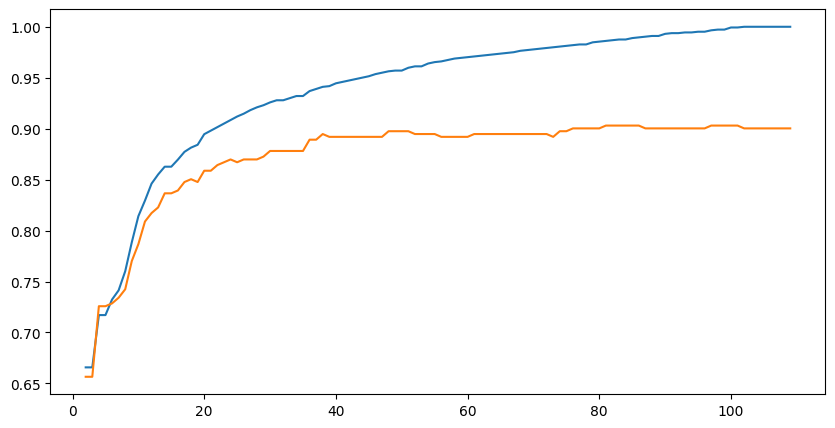

In [100]:
results = []
for i in range(2, 110):
    clf = DecisionTreeClassifier(random_state=42, max_leaf_nodes=i)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_pred = clf.predict(X_test)
    results.append((i, accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_pred)))

results_df = pd.DataFrame(results, columns=['max_leaf_nodes', 'train_accuracy', 'test_accuracy'])

plt.figure(figsize=(10, 5))
plt.plot(results_df['max_leaf_nodes'], results_df['train_accuracy'])
plt.plot(results_df['max_leaf_nodes'], results_df['test_accuracy'])

print(f'The highest the accuracy of {results_df["test_accuracy"].max()} is with {results_df["test_accuracy"].idxmax()} left nodes')

Tuning the hyperparameter **max_leaf_nodes** gave slightly better results than **max_depth**. The improvement over default leaf number was **1 %** increase in accuracy. The max_depth gave only **0.5 %**.  
Still, the accuracy gain is small for both.

### Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(df.drop(['classe'], axis=1), df['classe'], test_size=0.2, random_state=42)
def random_forest_classifier(n_estimators):
    rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rfc.fit(X_train, y_train)
    y_train_pred = rfc.predict(X_train)
    y_pred = rfc.predict(X_test)
    return y_pred, y_train_pred

In [102]:
y_pred, y_train_pred = random_forest_classifier(n_estimators=100)
print(f'Training set accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Test set accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

Training set accuracy: 1.0
Test set accuracy: 0.9722991689750693
[[ 88   1   1]
 [  2  66   5]
 [  1   0 197]]


The accuracy of **96.3 %** is already a very good result. 

In [103]:
# tune the hyperparameters using grid search
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 11],
    'max_features': [3, 5, 7, 9, 11]
}
rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_params_


{'max_depth': 11, 'max_features': 5, 'n_estimators': 300}

In [104]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=11, max_features=5, random_state=42)
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
y_pred = rfc.predict(X_test)
print(f'Training set accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Test set accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))


Training set accuracy: 1.0
Test set accuracy: 0.9722991689750693
[[ 87   1   2]
 [  1  67   5]
 [  1   0 197]]


The result for with the 'optimal' parameters did not change, it even got even **slightly worse**. So we will use models with 100 estimators and otherwise default parameters.

[0.14097533530884573, 0.06756625655790988, 0.06280415363017024, 0.056209890295323035, 0.05300391251166423, 0.052653476719379325, 0.0475362874548921, 0.04588393712556146, 0.04192365791268522, 0.0411798818341111, 0.03796044752232439, 0.03565585184454506, 0.033687487444083244, 0.029982914095487815, 0.028542119667904965, 0.025781171353075227, 0.024330320134969857, 0.02227834629340774, 0.02200982889282732, 0.021787548158222345, 0.021013199560328995, 0.0206081034365735, 0.02047514431942742, 0.0196856162937716, 0.014437420629232851, 0.0120276910032754]


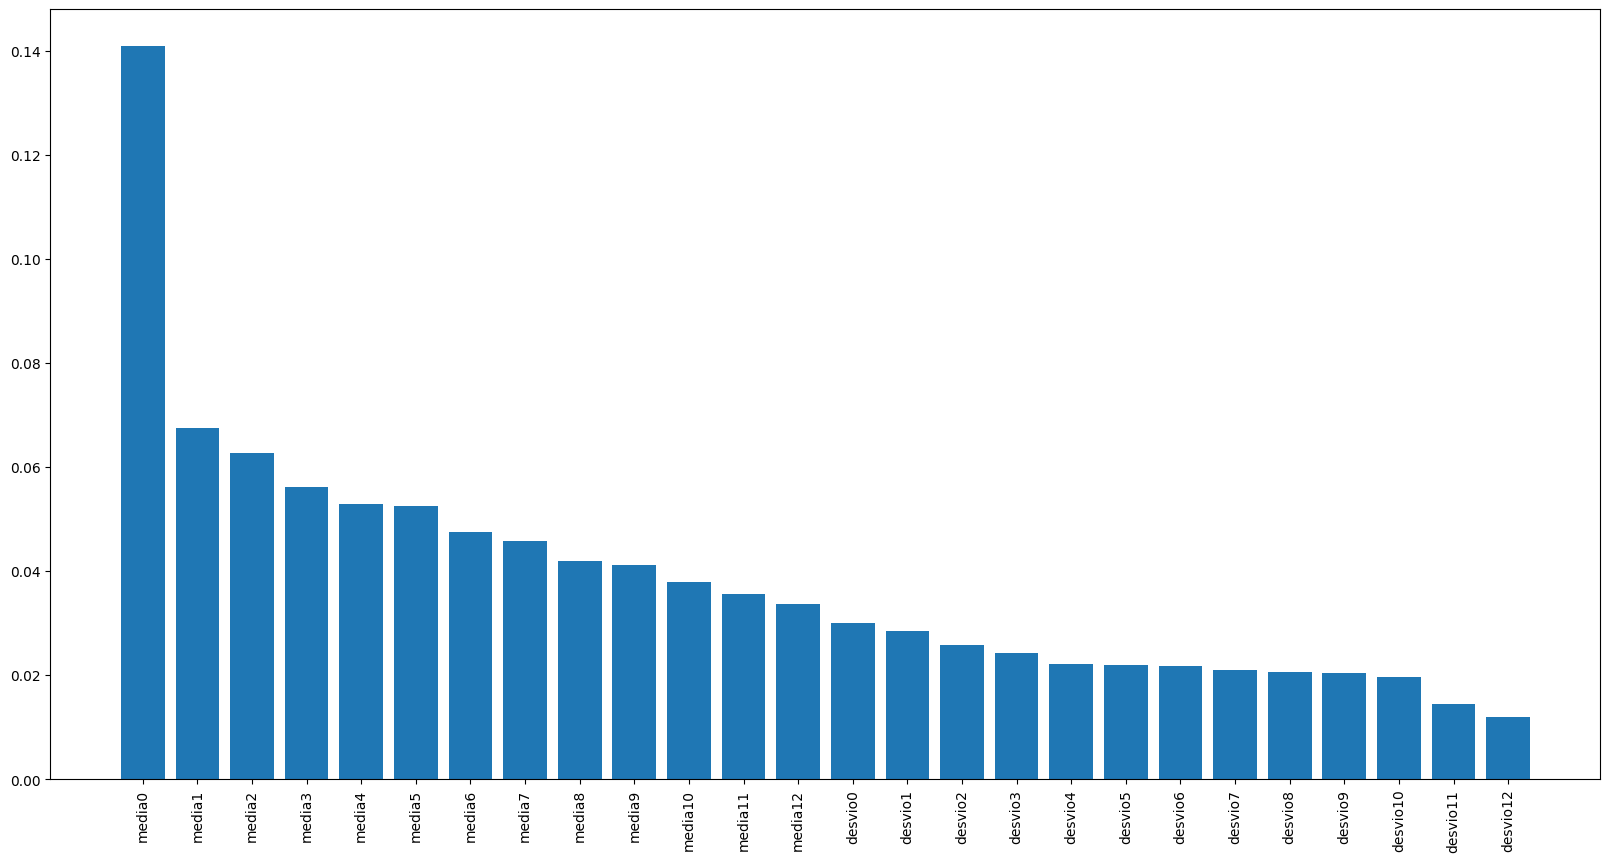

In [105]:
importances = rfc.feature_importances_.tolist()
importances.sort(reverse=True)
print(importances)
plt.figure(figsize=(20, 10))
plt.bar(X_train.columns, importances)
plt.xticks(rotation=90)
plt.show()


When we inspect the result we see something unusual; **the feature importance order is the same as the feature order**!  
We will reverse the order of features and see it the result is the same.

Training set accuracy: 1.0
Test set accuracy: 0.9695290858725761
[[ 86   2   2]
 [  2  66   5]
 [  0   0 198]]
[0.13728114044532935, 0.06415986131687548, 0.06050089232888475, 0.058912297978454674, 0.054690007245186294, 0.053712243887408036, 0.04906033262712591, 0.04541577799863724, 0.043648388263389, 0.041144977802113764, 0.038337869315491505, 0.03766072008270226, 0.03242731009101885, 0.03040808811079973, 0.029521463584057044, 0.024797423720756565, 0.022643873111121184, 0.02188962853618808, 0.021625928068751774, 0.021448922927537573, 0.02096463998208318, 0.020573438561609154, 0.020146995242435736, 0.019704183367510654, 0.016340756547953014, 0.012982838856579294]


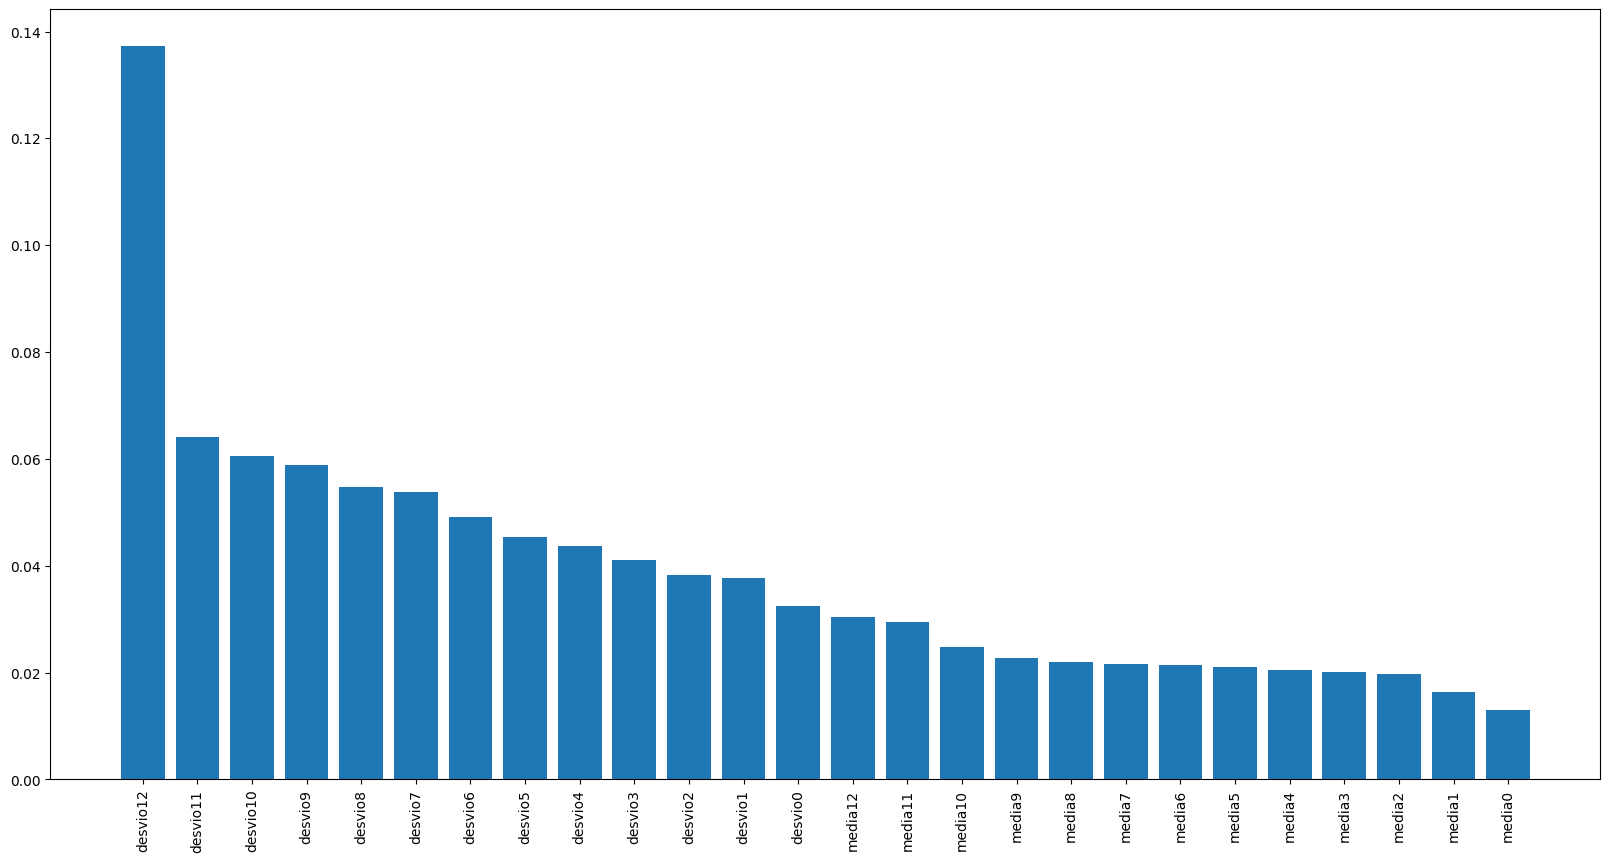

In [106]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=11, max_features=5, random_state=42)
X_train = X_train.iloc[:, ::-1]
X_test = X_test.iloc[:, ::-1]
rfc.fit(X_train, y_train)
y_train_pred = rfc.predict(X_train)
y_pred = rfc.predict(X_test)
print(f'Training set accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Test set accuracy: {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))
importances = rfc.feature_importances_.tolist()
importances.sort(reverse=True)
print(importances)
plt.figure(figsize=(20, 10))
plt.bar(X_train.columns, importances)
plt.xticks(rotation=90)
plt.show()

So the feature importance **is the same as the feature order**. This is because *Impurity-based feature importances can be misleading for high cardinality features (many unique values), source: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html*  
We should instead use a **Permutation feature importance**. Let's see the results using this method.

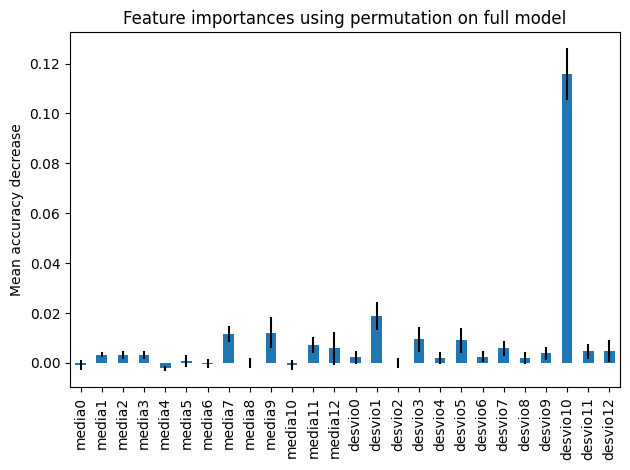

In [107]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=df.columns[:-1])
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### Summary
- The results are very different. We can see the **desvio10** is the most important feature for this model.  
- This does not exactly correlate with what we found in the EDA. Our observations there are that **media3** and **desvio3** would be the most important features when differentiating the classes.  
- In the Feature Selection section, we came to the same conclusion that the models perform the best with all the features and that no feature is **subsantially more** important than others, which is not in agreement with **desvio10** being the most important. The most important feature based on correlation to the target variable is **media2** not **desvio10**.

## 6. Support Vector Machine (SVM)

Using SVMs, build a classification model that allows you to differentiate the classes under analysis.
In this task you must: <br>
• Test all possible kernels;<br>
• Tune the SVM hyperparameters, ensuring that your model is not overfitting the training
data;<br>
• Present the SVM model with the best performance on your data, justifying the choice (you
should use results from models used in previous tasks to justify your answer).<br>


### Binary classification

In its most simple type, SVM doesn’t support multiclass classification natively. It supports binary classification, so let's start with it.<br>
We're going to predict of sound is carn horn or not.

In [108]:
import pandas as pd
df = pd.read_csv('all.csv')

df['classe'].mask(df['classe'] == 'car_horn', 1, inplace=True) 
df['classe'].mask(df['classe'] == 'gun_shot', 0, inplace=True)
df['classe'].mask(df['classe'] == 'jackhammer', 0, inplace=True)

df['classe'].unique()

array([1, 0], dtype=object)

In [109]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(['classe'], axis=1), df['classe'], test_size=0.2, random_state=42)

Now convert them to numpy to avoid problems in future.

In [110]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy() 
y_test = y_test.to_numpy() 
x_test = x_test.to_numpy() 

In [111]:
y_train = y_train.astype('int') #so SVC wont scream we're trying to fit regression into classification model
y_test = y_test.astype('int')

Let's find out for which hyperparemeters SVC is the best.

In [112]:
# Cross validation for hyper-parameter tuning
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from prettytable import PrettyTable
import numpy as np


hyperparameter_score_list = []
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    for c in np.arange(0.5,3,0.5):
        for g in [1,0.1,0.01,0.001]:
            svm = SVC(kernel=kernel, C=c, gamma=g)
            scores = cross_validate(svm, x_train, y_train, cv=10, scoring=['accuracy', 'f1', 'recall'])
            
            
            mean_accuracy = np.mean(scores['test_accuracy'])
            mean_f1 = np.mean(scores['test_f1'])
            mean_recall = np.mean(scores['test_recall'])
            hyperparameter_score_list.append([kernel, c, g, mean_accuracy, mean_f1, mean_recall])

# Choose the hyper-parameters (with highest average accuracy)
myTable = PrettyTable(["Kernel", "C", "gamma", "average accuracy", 'average f1', 'average recall'])
for row in hyperparameter_score_list:
    myTable.add_row([row[0], row[1], row[2], round(row[3],3), round(row[4],3), round(row[5],3)])
#print(myTable)
print(myTable.get_string(sortby="average f1"))

+---------+-----+-------+------------------+------------+----------------+
|  Kernel |  C  | gamma | average accuracy | average f1 | average recall |
+---------+-----+-------+------------------+------------+----------------+
|   poly  | 0.5 | 0.001 |      0.765       |    0.0     |      0.0       |
|   poly  | 1.0 | 0.001 |      0.765       |    0.0     |      0.0       |
|   poly  | 1.5 | 0.001 |      0.765       |    0.0     |      0.0       |
|   poly  | 2.0 | 0.001 |      0.765       |    0.0     |      0.0       |
|   poly  | 2.5 | 0.001 |      0.765       |    0.0     |      0.0       |
| sigmoid | 0.5 |   1   |      0.765       |    0.0     |      0.0       |
| sigmoid | 1.0 |   1   |      0.765       |    0.0     |      0.0       |
| sigmoid | 1.5 |   1   |      0.765       |    0.0     |      0.0       |
| sigmoid | 2.0 |   1   |      0.765       |    0.0     |      0.0       |
| sigmoid | 2.5 |   1   |      0.766       |   0.006    |     0.003      |
| sigmoid | 0.5 | 0.001 |

The best params are: rbf, C 2.0, 2.5 or 1.5 and gamma 0.1. Let's double check this information with grid search.

In [113]:
from sklearn.model_selection import GridSearchCV

c = np.arange(0.5,3,0.5)

param_grid = {'C': c, 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}


grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5]),
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [114]:
grid.best_params_

{'C': 2.5, 'gamma': 0.1, 'kernel': 'rbf'}

Results are the same

### Evaluation

In [115]:
model = SVC(kernel='rbf', C=2.5, gamma=0.1).fit(x_train, y_train)

In [116]:
from sklearn.metrics import classification_report, confusion_matrix

model_predictions = model.predict(x_test)
print(classification_report(y_test, model_predictions)) #1 is for car horn

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       271
           1       1.00      0.99      0.99        90

    accuracy                           1.00       361
   macro avg       1.00      0.99      1.00       361
weighted avg       1.00      1.00      1.00       361



In [117]:
print(confusion_matrix(y_test, model_predictions))

[[271   0]
 [  1  89]]


In [118]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

predicted = model.predict(x_test)

accuracy = accuracy_score(y_test, predicted)
f1 = f1_score(y_test, predicted, average='weighted')
recall = recall_score(y_test, predicted, average='weighted')

print('Accuracy: ', "%.2f" % (accuracy*100))
print('F1: ', "%.2f" % (f1*100))
print('Recall: ', "%.2f" % (recall*100))

Accuracy:  99.72
F1:  99.72
Recall:  99.72


For binary classification result are almost too good to be true. But it's result of search for the best parameters. Once we try the worst found parameters, the results will drop dramatically:

In [132]:
model = SVC(kernel='poly', C=0.5, gamma=0.001).fit(x_train, y_train)

In [133]:
predicted = model.predict(x_test)

accuracy = accuracy_score(y_test, predicted)
f1 = f1_score(y_test, predicted, average='weighted')
recall = recall_score(y_test, predicted, average='weighted')

print('Accuracy: ', "%.2f" % (accuracy*100))
print('F1: ', "%.2f" % (f1*100))
print('Recall: ', "%.2f" % (recall*100))

Accuracy:  54.85
F1:  38.85
Recall:  54.85


### Multiclass classification

### One-To-Rest approach

It involves splitting the multi-class dataset into multiple binary classification problems. A binary classifier is then trained on each binary classification problem and predictions are made using the model that is the most confident.

Binary Classification Problem 1: car_horn vs [gun_shot, jackhammer] <br>
Binary Classification Problem 2: gun_shot vs [car_horn, jackhammer] <br>
Binary Classification Problem 3: jackhammer vs [car_horn, gun_shot] <br>

In [119]:
import pandas as pd
df = pd.read_csv('all.csv')

df['classe'].unique()

array(['car_horn', 'gun_shot', 'jackhammer'], dtype=object)

In [120]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(['classe'], axis=1), df['classe'], test_size=0.2, random_state=42)

In [121]:
from sklearn.svm import SVC

model_ovr = SVC(kernel='rbf', C=2.5, gamma=0.1, decision_function_shape='ovr').fit(x_train, y_train)

In [122]:
from sklearn.metrics import accuracy_score, f1_score, recall_score

predicted = model_ovr.predict(x_test)

accuracy = accuracy_score(y_test, predicted)
f1 = f1_score(y_test, predicted, average='weighted')
recall = recall_score(y_test, predicted, average='weighted')

print('Accuracy: ', "%.2f" % (accuracy*100))
print('F1: ', "%.2f" % (f1*100))
print('Recall: ', "%.2f" % (recall*100))

Accuracy:  98.89
F1:  98.89
Recall:  98.89


In [123]:
print(confusion_matrix(y_test, predicted))

[[ 89   0   1]
 [  2  70   1]
 [  0   0 198]]


### One-To-One approach

In [124]:
model_ovo = SVC(kernel='rbf', C=2.5, gamma=0.1, decision_function_shape='ovo').fit(x_train, y_train)

In [125]:
predicted = model_ovo.predict(x_test)

accuracy = accuracy_score(y_test, predicted)
f1 = f1_score(y_test, predicted, average='weighted')
recall = recall_score(y_test, predicted, average='weighted')

print('Accuracy: ', "%.2f" % (accuracy*100))
print('F1: ', "%.2f" % (f1*100))
print('Recall: ', "%.2f" % (recall*100))

Accuracy:  98.89
F1:  98.89
Recall:  98.89


In [126]:
print(confusion_matrix(y_test, predicted))

[[ 89   0   1]
 [  2  70   1]
 [  0   0 198]]


### Summary:
- adjusting parameters to the model is very important: we tried for example to run model with the worst found parameters (poly, 0.5, 0.001) and the results were dramatically lower (around 40-50%)
- with the best parameters results on the test data are very good
- approach used doesn't really matter (ovo vs. ovr)

## 7. Principal component analysis (PCA)

We will use the PCA to perform an indirect **feature selection**.  
We will then compare the results of some models with all features and then only the selected ones, to see if the results are improved.

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('all.csv')
X_train, X_test, y_train, y_test = train_test_split(df.drop(['classe'], axis=1), df['classe'], test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [128]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
print(f'Number of features: {pca.n_features_}')
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

Number of features: 26


In [129]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm = SVC(kernel='rbf', C=2.5, gamma=0.1)
svm.fit(X_train_transformed, y_train)
y_pred = svm.predict(X_test_transformed)
print('Results for SVM:')
print('Accuracy with 2 components: {:.0f}%'.format(accuracy_score(y_test, y_pred) * 100))

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('Accuracy with original data: {:.0f}%'.format(accuracy_score(y_test, y_pred) * 100))

Results for SVM:
Accuracy with 2 components: 75%
Accuracy with original data: 100%


In [130]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_transformed, y_train)
y_pred = rf.predict(X_test_transformed)
print('Results from Random Forest Classifier:')
print('Accuracy with 2 components: {:.0f}%'.format(accuracy_score(y_test, y_pred) * 100))

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy with original data: {:.0f}%'.format(accuracy_score(y_test, y_pred) * 100))

Results from Random Forest Classifier:
Accuracy with 2 components: 76%


Accuracy with original data: 97%


In [131]:
for i in range(1, 13):
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_train_transformed = pca.transform(X_train)
    X_test_transformed = pca.transform(X_test)
    svm = SVC(kernel='rbf', C=2)
    svm.fit(X_train_transformed, y_train)
    y_pred = svm.predict(X_test_transformed)
    print(f'Accuracy with {pca.n_components_} components: {accuracy_score(y_test, y_pred) * 100:.0f}%')

Accuracy with 1 components: 69%
Accuracy with 2 components: 74%
Accuracy with 3 components: 86%
Accuracy with 4 components: 91%
Accuracy with 5 components: 93%
Accuracy with 6 components: 92%
Accuracy with 7 components: 94%
Accuracy with 8 components: 96%
Accuracy with 9 components: 96%
Accuracy with 10 components: 97%
Accuracy with 11 components: 97%
Accuracy with 12 components: 97%


### Summary:
- We **do not achieve better results** when using Principal Component Analysis, even when varying the number components.